# **Problem** **Statement-A**:

## Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interest on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

## A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

## Data that is available includes information from the financial statement of the companies for the previous year.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV


In [3]:
path = "/content/CompData-1.xlsx"
df=pd.read_excel(path)
df.tail(5)

Co_Code           Co_Name  _Operating_Expense_Rate  \
2053     2743  Kothari Ferment.             3.021580e-04   
2054    21216    Firstobj.Tech.             1.371450e-04   
2055      142  Diamines & Chem.             2.114990e-04   
2056    18014       IL&FS Engg.             3.750000e+09   
2057    43229      Channel Nine             2.981110e-04   

      _Research_and_development_expense_rate  _Cash_flow_rate  \
2053                            6.490000e+09         0.477066   
2054                            0.000000e+00         0.465211   
2055                            8.370000e+09         0.480248   
2056                            0.000000e+00         0.474670   
2057                            0.000000e+00         0.467203   

      _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
2053                              0.000000     0.183014              0.322063   
2054                              0.000658     0.000000              0.319764   
2055                              0.000502     0.000000              0.327828   
2056                              0.000578     0.306205              0.322027   
2057                              0.000826     0.000000              0.330021   

      _Per_Share_Net_profit_before_tax_Yuan_  \
2053                                0.192739   
2054                                0.169391   
2055                                0.155005   
2056                                0.173834   
2057                                0.180236   

      _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
2053                                  0.022127  ...              0.320387   
2054                                  0.022072  ...              0.312324   
2055                                  0.021861  ...              0.313122   
2056                                  0.022167  ...              0.315632   
2057                                  0.022418  ...              0.316734   

      _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
2053                              0.004430                       0   
2054                              0.032284                       0   
2055                              0.040998                       0   
2056                              0.020275                       0   
2057                              0.031368                       0   

      _Total_assets_to_GNP_price  _No_credit_Interval  \
2053                    0.000420             0.624567   
2054                    0.000882             0.624008   
2055                    0.009579             0.623718   
2056                    0.004958             0.623443   
2057                    0.000186             0.623588   

      _Degree_of_Financial_Leverage_DFL  \
2053                           0.026791   
2054                           0.024201   
2055                           0.026702   
2056                           0.026943   
2057                           0.026871   

      _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
2053                                           0.565158                 1   
2054                                           0.573670                 1   
2055                                           0.564697                 1   
2056                                           0.565792                 1   
2057                                           0.565512                 1   

      _Equity_to_Liability  Default  
2053              0.171662        0  
2054              0.053740        0  
2055              0.054984        0  
2056              0.057553        0  
2057              0.020266        0  

[5 rows x 58 columns]

In [4]:
df.columns =df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

## There are 53 "float", 4 "Int" and 1 "Object" datatpe variables in the data, the output also shows few missing or null values in few columns like "_Cash_Flow_Per_Share", "_Total_debt_to_Total_net_worth", "_Cash_to_Total_Assets", "_Current_Liability_to_Current_Assets"

In [6]:
df.shape

(2058, 58)

The data set contains,
Rows- 2058
Columns - 58

In [7]:
df.describe().T

count          mean  \
Co_Code                                            2058.0  1.757211e+04   
_Operating_Expense_Rate                            2058.0  2.052389e+09   
_Research_and_development_expense_rate             2058.0  1.208634e+09   
_Cash_flow_rate                                    2058.0  4.652426e-01   
_Interest_bearing_debt_interest_rate               2058.0  1.113022e+07   
_Tax_rate_A                                        2058.0  1.147770e-01   
_Cash_Flow_Per_Share                               1891.0  3.199856e-01   
_Per_Share_Net_profit_before_tax_Yuan_             2058.0  1.769673e-01   
_Realized_Sales_Gross_Profit_Growth_Rate           2058.0  2.276117e-02   
_Operating_Profit_Growth_Rate                      2058.0  8.481083e-01   
_Continuous_Net_Profit_Growth_Rate                 2058.0  2.173915e-01   
_Total_Asset_Growth_Rate                           2058.0  5.287663e+09   
_Net_Value_Growth_Rate                             2058.0  5.189504e+06   
_Total_Asset_Return_Growth_Rate_Ratio              2058.0  2.641004e-01   
_Cash_Reinvestment_perc                            2058.0  3.771970e-01   
_Current_Ratio                                     2058.0  1.336249e+06   
_Quick_Ratio                                       2058.0  2.775510e+07   
_Interest_Expense_Ratio                            2058.0  6.312913e-01   
_Total_debt_to_Total_net_worth                     2037.0  1.071429e+07   
_Long_term_fund_suitability_ratio_A                2058.0  8.973310e-03   
_Net_profit_before_tax_to_Paid_in_capital          2058.0  1.753994e-01   
_Total_Asset_Turnover                              2058.0  1.286405e-01   
_Accounts_Receivable_Turnover                      2058.0  4.159864e+07   
_Average_Collection_Days                           2058.0  2.629786e+07   
_Inventory_Turnover_Rate_times                     2058.0  2.030227e+09   
_Fixed_Assets_Turnover_Frequency                   2058.0  1.230898e+09   
_Net_Worth_Turnover_Rate_times                     2058.0  3.957710e-02   
_Operating_profit_per_person                       2058.0  4.036693e-01   
_Allocation_rate_per_person                        2058.0  5.725559e+06   
_Quick_Assets_to_Total_Assets                      2058.0  3.421979e-01   
_Cash_to_Total_Assets                              1962.0  7.993675e-02   
_Quick_Assets_to_Current_Liability                 2058.0  1.190476e+07   
_Cash_to_Current_Liability                         2058.0  9.282507e+07   
_Operating_Funds_to_Liability                      2058.0  3.482338e-01   
_Inventory_to_Working_Capital                      2058.0  2.777491e-01   
_Inventory_to_Current_Liability                    2058.0  5.786346e+07   
_Long_term_Liability_to_Current_Assets             2058.0  7.340107e+07   
_Retained_Earnings_to_Total_Assets                 2058.0  9.303546e-01   
_Total_income_to_Total_expense                     2058.0  2.357977e-03   
_Total_expense_to_Assets                           2058.0  3.109208e-02   
_Current_Asset_Turnover_Rate                       2058.0  1.273303e+09   
_Quick_Asset_Turnover_Rate                         2058.0  2.571768e+09   
_Cash_Turnover_Rate                                2058.0  2.653696e+09   
_Fixed_Assets_to_Assets                            2058.0  4.042760e+06   
_Cash_Flow_to_Total_Assets                         2058.0  6.442325e-01   
_Cash_Flow_to_Liability                            2058.0  4.599747e-01   
_CFO_to_Assets                                     2058.0  5.797344e-01   
_Cash_Flow_to_Equity                               2058.0  3.146292e-01   
_Current_Liability_to_Current_Assets               2044.0  3.935178e-02   
_Liability_Assets_Flag                             2058.0  3.401361e-03   
_Total_assets_to_GNP_price                         2058.0  2.779397e+07   
_No_credit_Interval                                2058.0  6.236856e-01   
_Degree_of_Financial_Leverage_DFL                  2058.0  2.785248e-02   
_I

In [8]:
df.size

119364

In [9]:
df.isnull().sum().sum()

298

In [10]:
298/119364

0.00249656512851446

## From the output we can say that 2 percent of the data is missing

## Check for Duplicte rows

In [11]:
df.duplicated().sum()

0

### There are no duplicate rows in the dataset

In [12]:
df["Default"].value_counts()

Default
0    1838
1     220
Name: count, dtype: int64

In [13]:
df['Default'].value_counts(normalize = True)

Default
0    0.8931
1    0.1069
Name: proportion, dtype: float64

In [14]:
df.isnull().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

In [15]:
df_X = df.drop(['Default', 'Co_Code', 'Co_Name'], axis=1)
df_Y = df['Default']

# Outlier Detection

<Axes: >

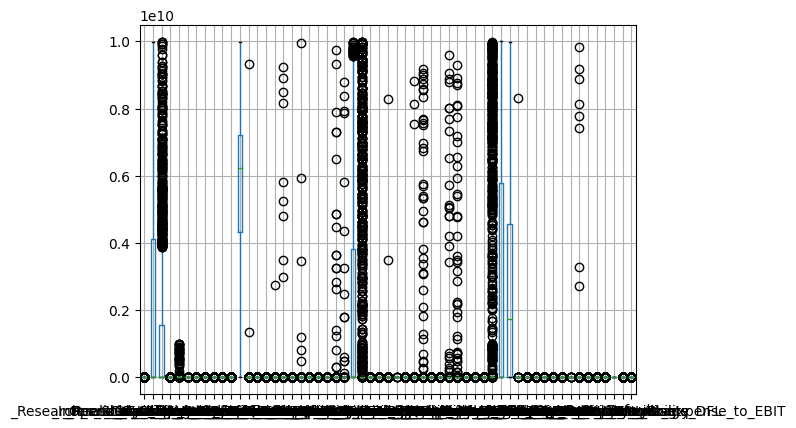

In [16]:
df.boxplot()

# The boxplot crearly shows many outliers

## Outlier treatment using IQR

In [17]:
def remove_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

In [18]:
for column in df_X.columns:
    lower_limit, upper_limit = remove_outlier(df_X[column])
    df_X[column] = np.where(df_X[column] > upper_limit, upper_limit, df_X[column])
    df_X[column] = np.where(df_X[column] < lower_limit, lower_limit, df_X[column])

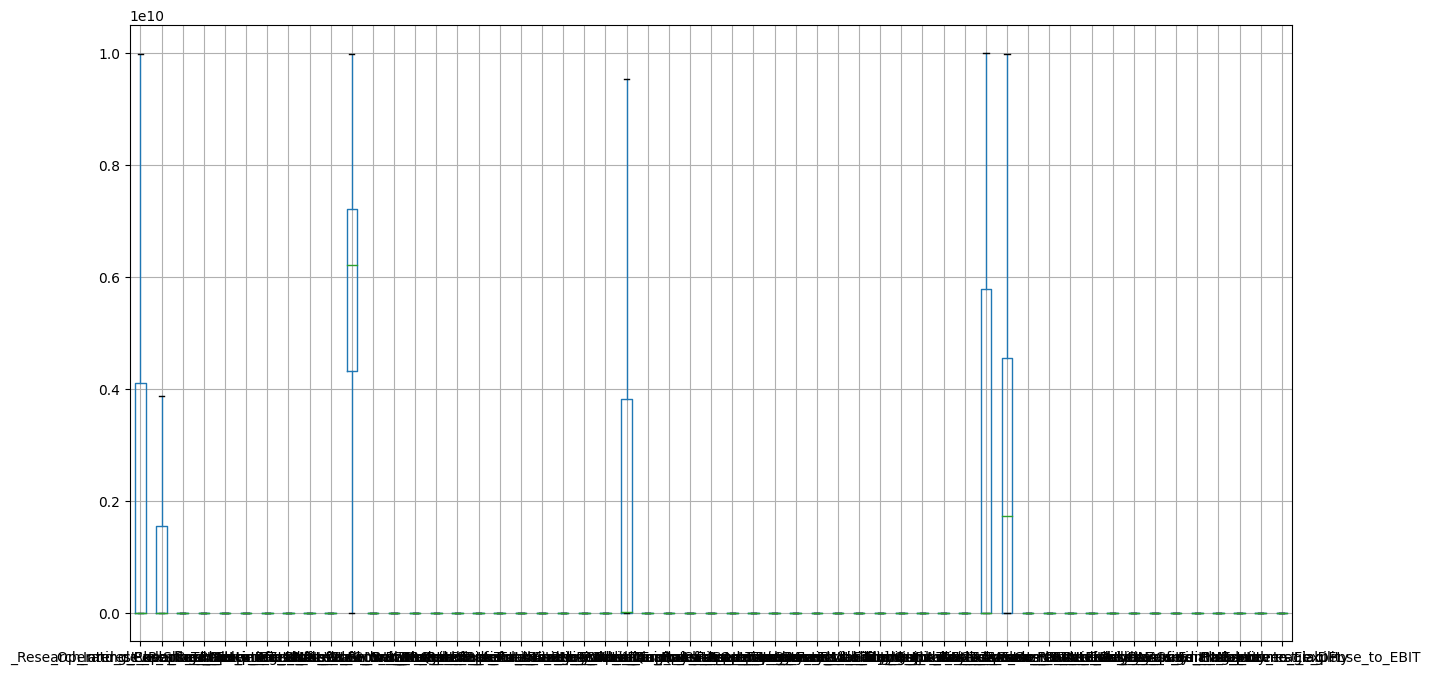

In [19]:
df_X.boxplot(figsize=(15,8))
plt.show();

## 2) Treating Missing Values

In [20]:
df_X.isnull().sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                                           0
_Interest_Expense_Ratio                                0
_Total_debt_to_Total_net_worth 

The columns Cash_Flow_Per_Share", "_Total_debt_to_Total_net_worth", "_Cash_to_Total_Assets", "_Current_Liability_to_Current_Assets" have missing values

In [21]:
df_X = df_X.fillna(df_X.mean())
print("Number of missing values in df_X:", df_X.isnull().sum().sum())

Number of missing values in df_X: 0


In [22]:
df_X.isnull().sum()

_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_Expense_Ratio                              0
_Total_debt_to_Total_net_worth                       0
_Long_term

## There are no missing values now

# PART A: Univariate (4 marks) & Bivariate (6 marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

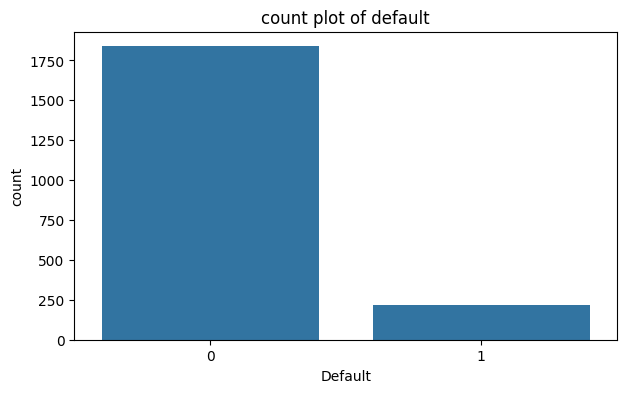

In [23]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Default')
plt.xlabel('Default')
plt.title('count plot of default')
plt.show()

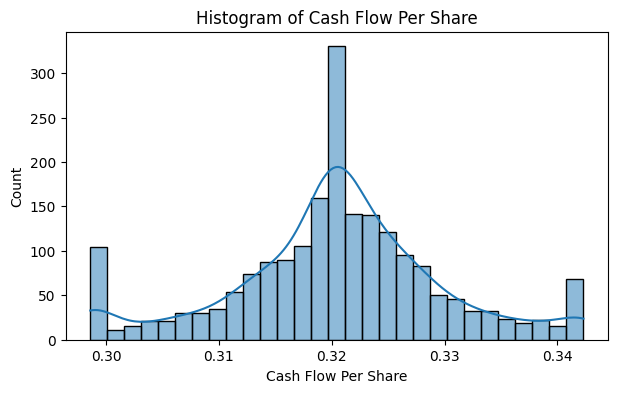

In [24]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df_X, x='_Cash_Flow_Per_Share', kde=True)
plt.xlabel('Cash Flow Per Share')
plt.title('Histogram of Cash Flow Per Share')
plt.show()

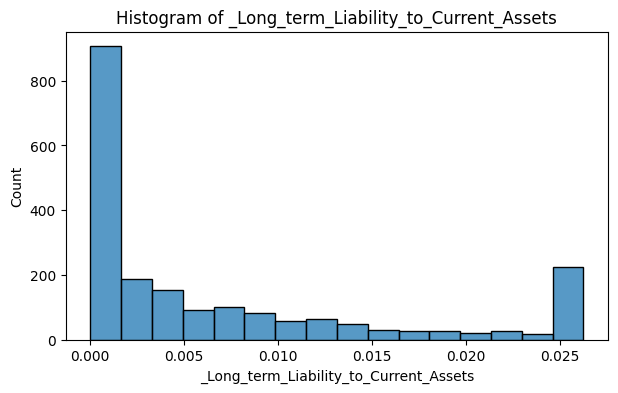

In [25]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df_X, x='_Long_term_Liability_to_Current_Assets')
plt.xlabel('_Long_term_Liability_to_Current_Assets')
plt.title('Histogram of _Long_term_Liability_to_Current_Assets')
plt.show()

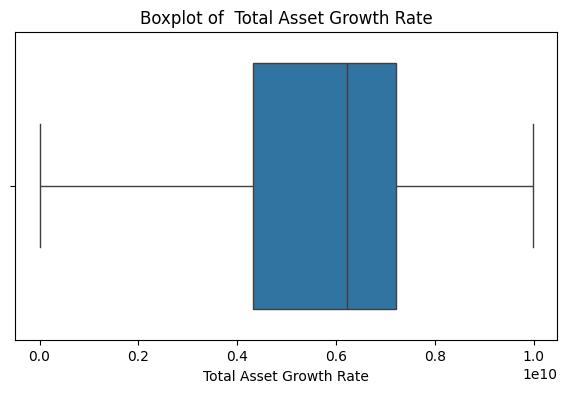

In [26]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df_X, x="_Total_Asset_Growth_Rate")
plt.xlabel("Total Asset Growth Rate")
plt.title("Boxplot of  Total Asset Growth Rate")
plt.show()

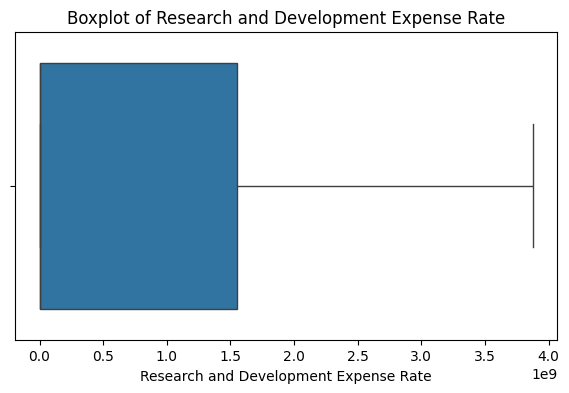

In [27]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df_X, x="_Research_and_development_expense_rate")
plt.xlabel("Research and Development Expense Rate")
plt.title("Boxplot of Research and Development Expense Rate")
plt.show()

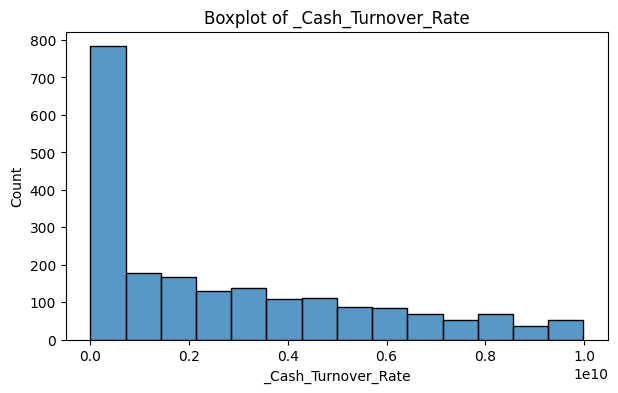

In [28]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df_X, x="_Cash_Turnover_Rate")
plt.xlabel("_Cash_Turnover_Rate")
plt.title("Boxplot of _Cash_Turnover_Rate")
plt.show()

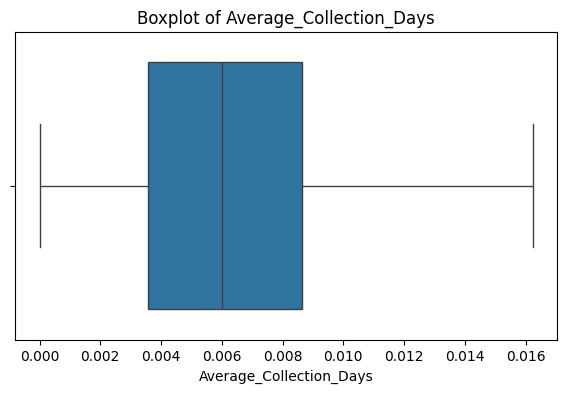

In [29]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df_X, x="_Average_Collection_Days")
plt.xlabel("Average_Collection_Days")
plt.title("Boxplot of Average_Collection_Days")
plt.show()

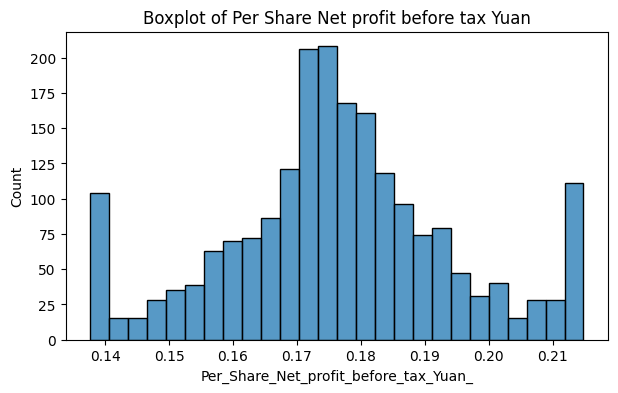

In [30]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df_X, x="_Per_Share_Net_profit_before_tax_Yuan_")
plt.xlabel("Per_Share_Net_profit_before_tax_Yuan_")
plt.title("Boxplot of Per Share Net profit before tax Yuan")
plt.show()

# Bi-varient analysis

In [31]:
df1 = pd.concat([df_X, df_Y], axis = 1)

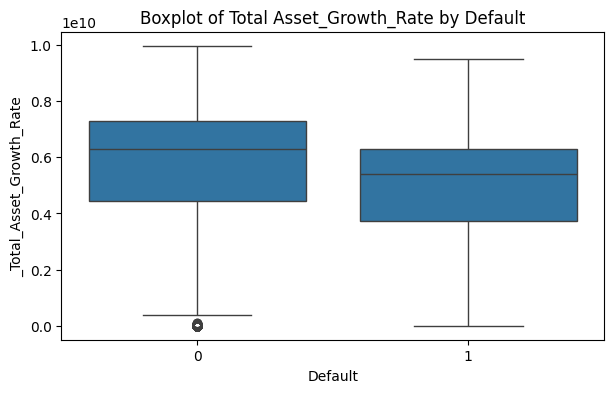

In [32]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df1, x='Default', y='_Total_Asset_Growth_Rate')
plt.xlabel('Default')
plt.ylabel('_Total_Asset_Growth_Rate')
plt.title('Boxplot of Total Asset_Growth_Rate by Default')
plt.show()

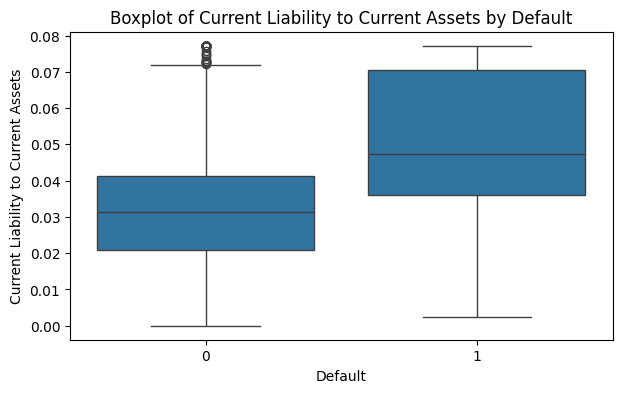

In [33]:
plt.figure(figsize=(7, 4))
sns.boxplot(df1, x='Default', y='_Current_Liability_to_Current_Assets')
plt.xlabel('Default')
plt.ylabel('Current Liability to Current Assets')
plt.title('Boxplot of Current Liability to Current Assets by Default')
plt.show()

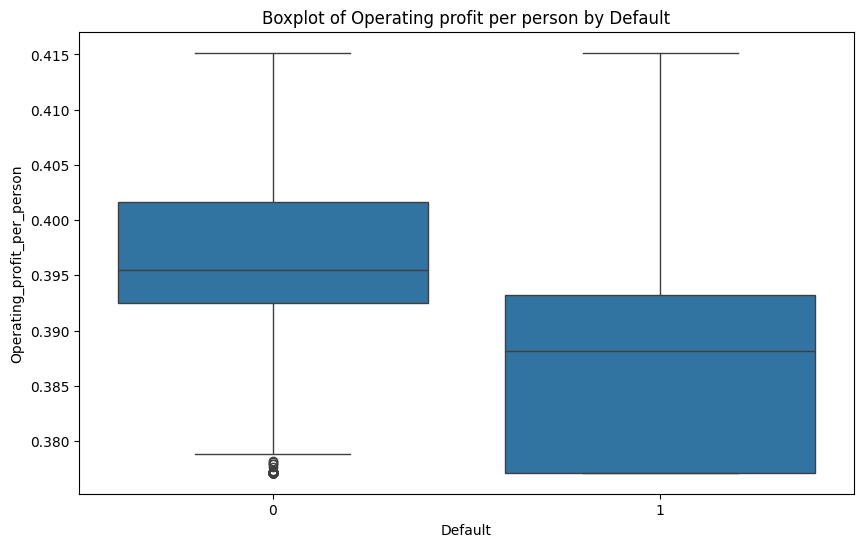

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Default', y='_Operating_profit_per_person')
plt.xlabel('Default')
plt.ylabel('Operating_profit_per_person')
plt.title('Boxplot of Operating profit per person by Default')
plt.show()

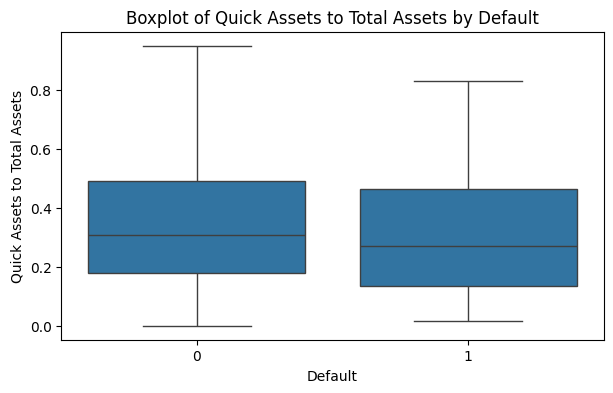

In [35]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df1, x='Default', y='_Quick_Assets_to_Total_Assets')
plt.xlabel('Default')
plt.ylabel('Quick Assets to Total Assets')
plt.title('Boxplot of Quick Assets to Total Assets by Default')
plt.show()

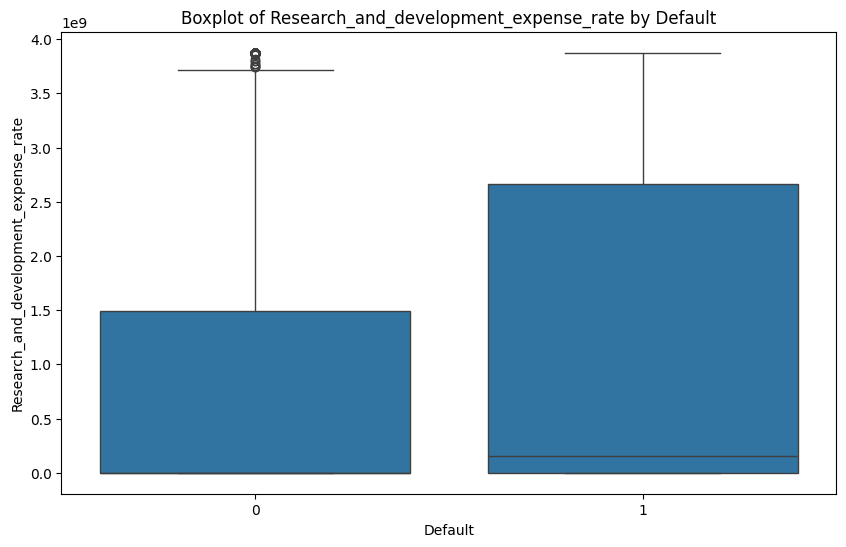

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Default', y='_Research_and_development_expense_rate')
plt.xlabel('Default')
plt.ylabel('Research_and_development_expense_rate')
plt.title('Boxplot of Research_and_development_expense_rate by Default')
plt.show()

In [37]:
df_X = df_X.drop(['_Realized_Sales_Gross_Profit_Growth_Rate',
                  '_Operating_Profit_Growth_Rate',
                  '_Continuous_Net_Profit_Growth_Rate',
                  '_Current_Asset_Turnover_Rate',
                  '_Cash_Flow_to_Liability',
                  '_No_credit_Interval',
                  '_Degree_of_Financial_Leverage_DFL',
                  '_Interest_bearing_debt_interest_rate',
                  '_Net_Value_Growth_Rate',
                  '_Total_Asset_Return_Growth_Rate_Ratio',
                  '_Interest_Expense_Ratio',
                  '_Long_term_fund_suitability_ratio_A',
                  '_Accounts_Receivable_Turnover',
                  '_Inventory_to_Working_Capital',
                  '_Retained_Earnings_to_Total_Assets',
                  '_Total_income_to_Total_expense',
                  '_Interest_Coverage_Ratio_Interest_expense_to_EBIT'],axis=1)

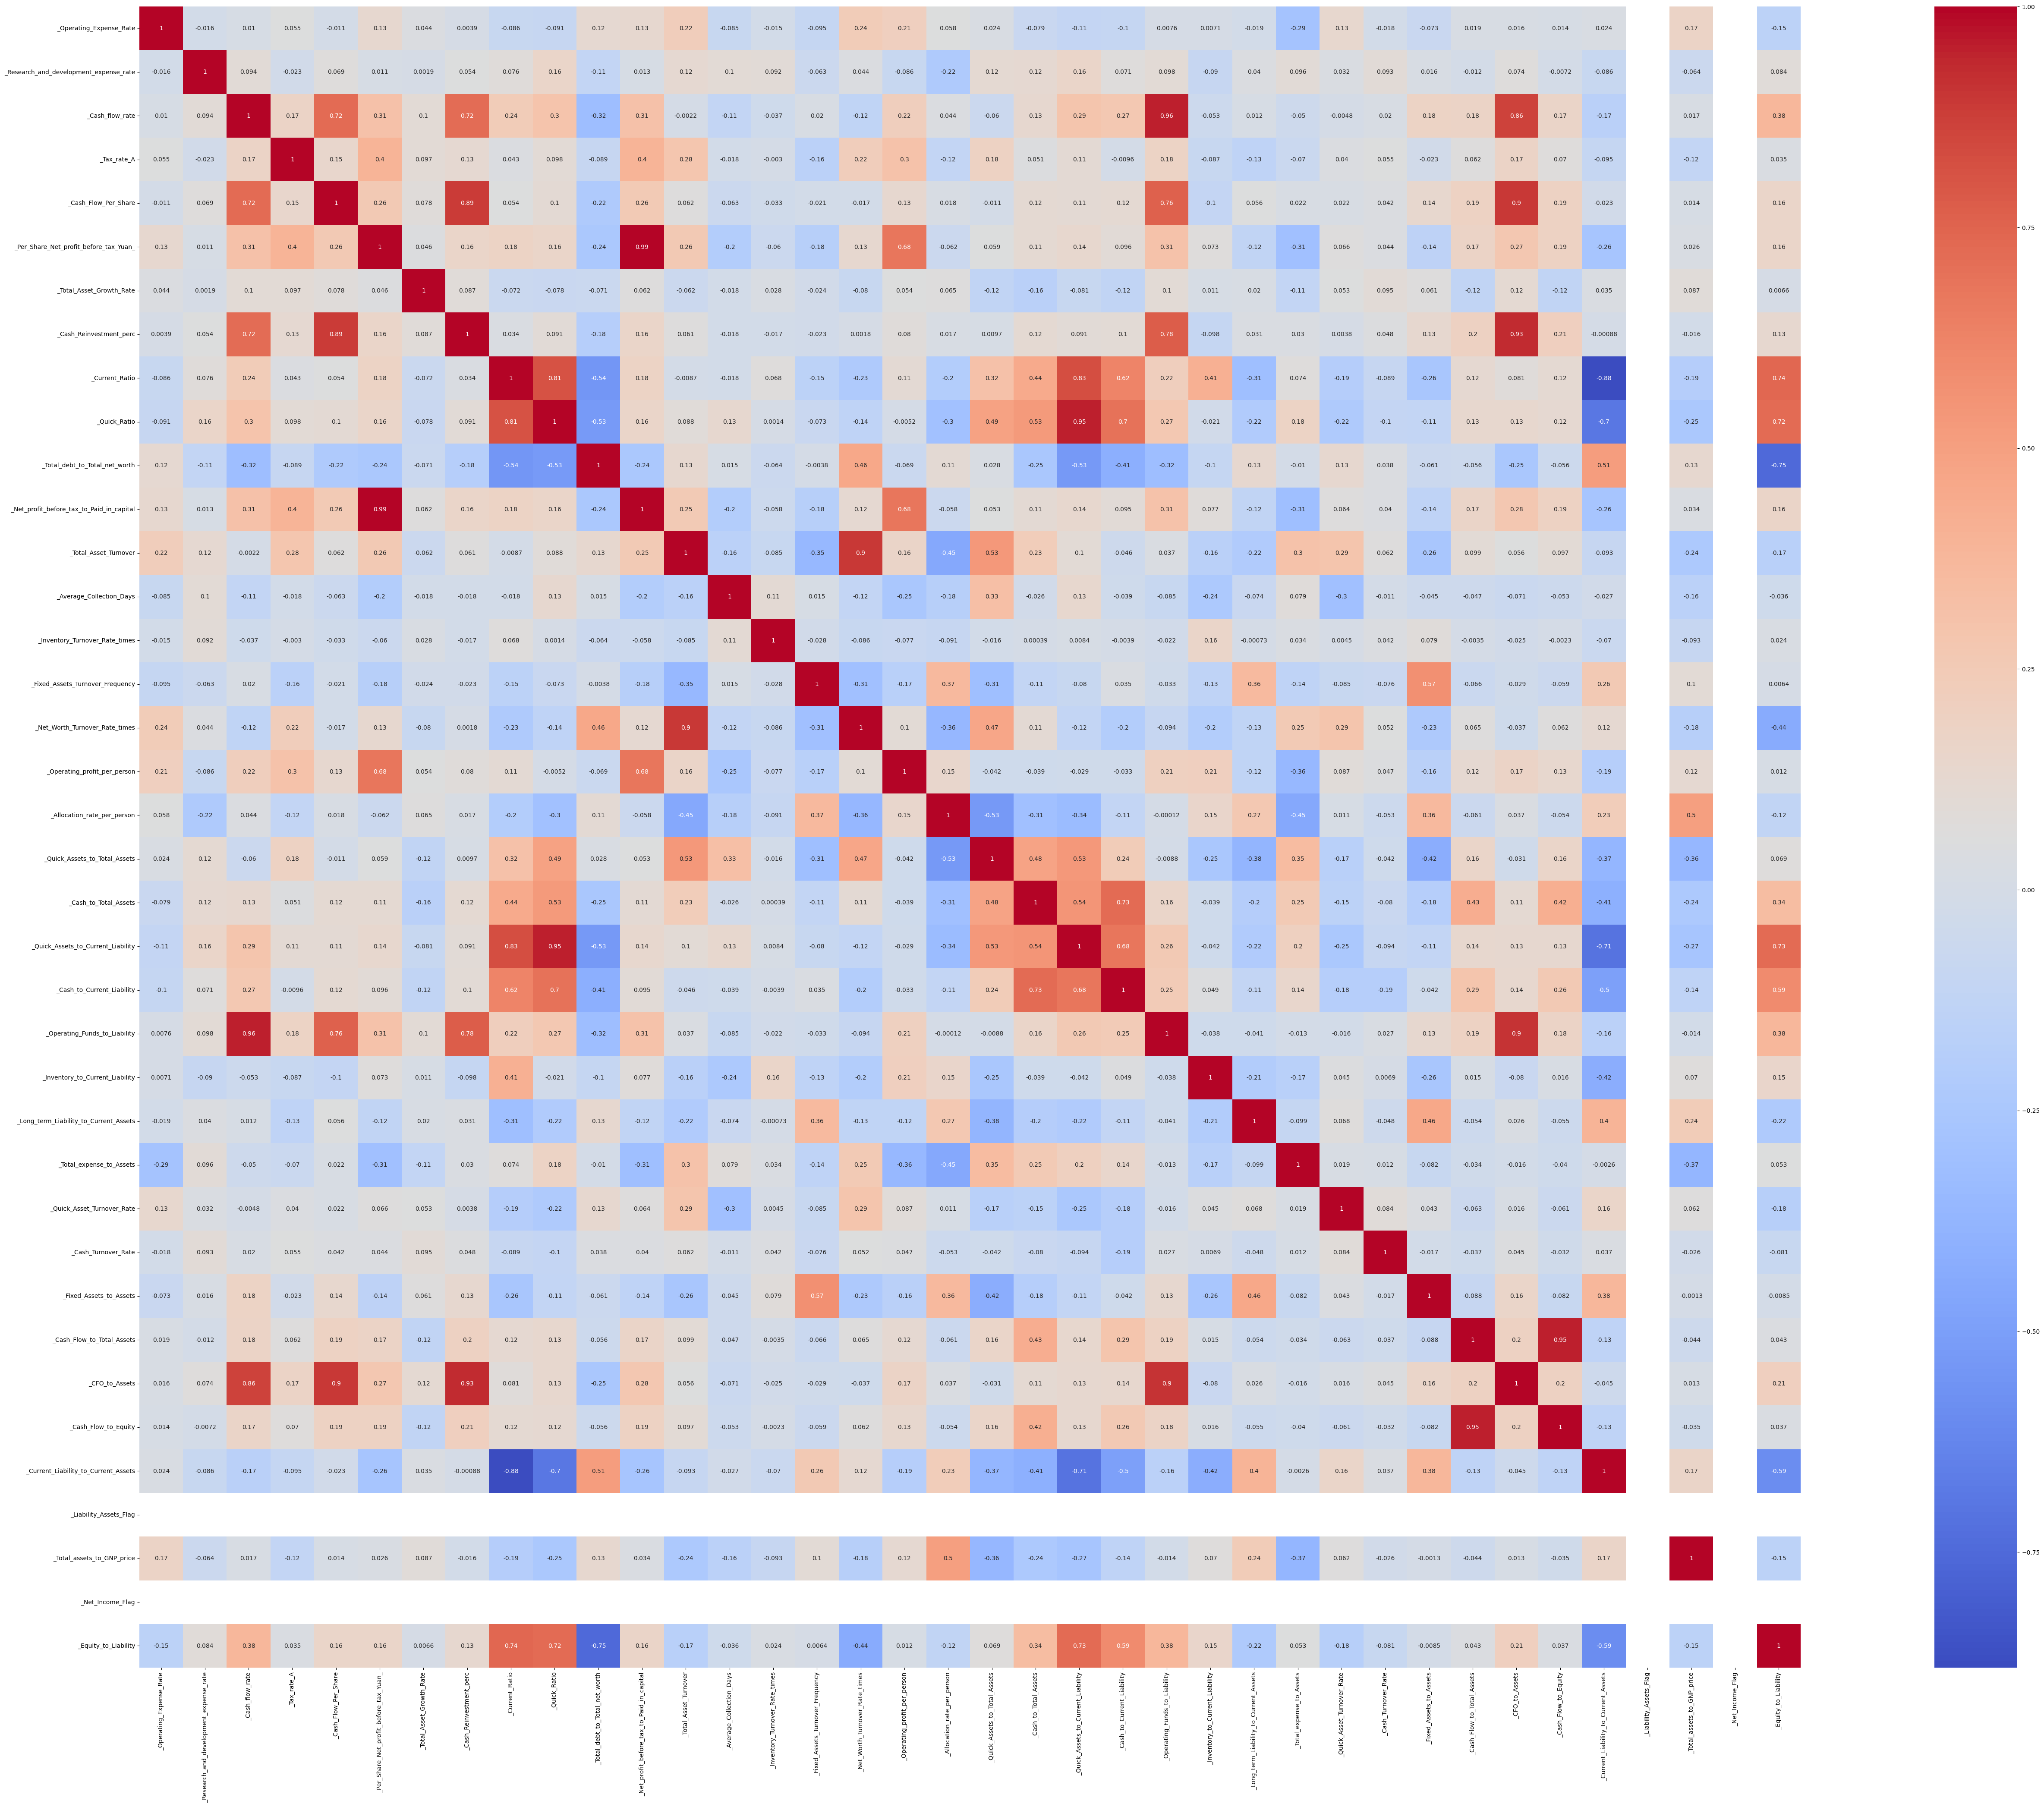

In [38]:
plt.figure(figsize=(80,50))
p=sns.heatmap(df_X.corr(), annot=True,cmap='coolwarm',square=True)

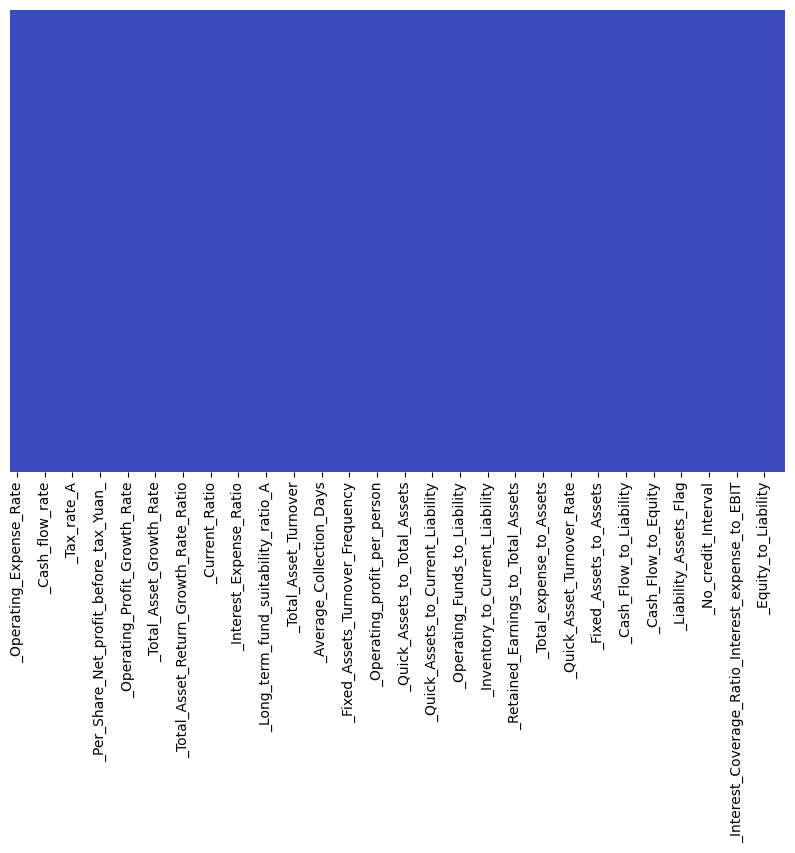

In [39]:
plt.figure(figsize = (10,6))
sns.heatmap(df1.isnull(),cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler #Scale train and test separately
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_X), columns =df_X.columns)

## Variation inflation factor

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [42]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
11  _Net_profit_before_tax_to_Paid_in_capital  96.000707
5      _Per_Share_Net_profit_before_tax_Yuan_  95.927595
31                             _CFO_to_Assets  28.165164
23              _Operating_Funds_to_Liability  20.910749
21         _Quick_Assets_to_Current_Liability  19.146856
2                             _Cash_flow_rate  15.846120
16             _Net_Worth_Turnover_Rate_times  14.248694
8                              _Current_Ratio  13.848679
12                      _Total_Asset_Turnover  12.849438
9                                _Quick_Ratio  12.287932
30                 _Cash_Flow_to_Total_Assets  12.224787
7                     _Cash_Reinvestment_perc  12.196218
32                       _Cash_Flow_to_Equity  12.194743
33       _Current_Liability_to_Current_Assets   6.588567
4                        _Cash_Flow_Per_Share   6.179388
37                       _Equity_to_Liability   5.971514
19              _Quick_Assets_to_Total_Assets   5.622442
10             _Total_debt_to_Total_net_worth   4.281369
22                 _Cash_to_Current_Liability   4.147829
20                      _Cash_to_Total_Assets   3.479972
24            _Inventory_to_Current_Liability   3.195796
29                    _Fixed_Assets_to_Assets   2.724307
18                _Allocation_rate_per_person   2.498953
17               _Operating_profit_per_person   2.354075
26                   _Total_expense_to_Assets   2.007001
15           _Fixed_Assets_Turnover_Frequency   1.749722
13                   _Average_Collection_Days   1.733313
35                 _Total_assets_to_GNP_price   1.701170
25     _Long_term_Liability_to_Current_Assets   1.668874
27                 _Quick_Asset_Turnover_Rate   1.358817
3                                 _Tax_rate_A   1.347628
0                     _Operating_Expense_Rate   1.303790
1      _Research_and_development_expense_rate   1.167910
14             _Inventory_Turnover_Rate_times   1.146140
6                    _Total_Asset_Growth_Rate   1.122719
28                        _Cash_Turnover_Rate   1.100221
34                     _Liability_Assets_Flag        NaN
36                           _Net_Income_Flag        NaN

##Almost every varibales has VIF higher than 5 execpt
 _Total_debt_to_Total_net_worth, _Cash_to_Current_Liability, Cash_to_Total_Assets, Cash_to_Total_Assets, _Fixed_Assets_to_Assets, _Allocation_rate_per_person, _Operating_profit_per_person, _Total_expense_to_Assets, _Fixed_Assets_Turnover_Frequency, _Average_Collection_Days, _Total_assets_to_GNP_price, _Long_term_Liability_to_Current_Assets, _Total_Asset_Growth_Rate, _Net_Income_Flag

##we eleminate the highest one first and continue to do so as the (VIF) of  variables change if we eleminated the variables

In [43]:
X = X.drop('_Net_profit_before_tax_to_Paid_in_capital', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
30                          _CFO_to_Assets  27.630201
22           _Operating_Funds_to_Liability  20.863824
20      _Quick_Assets_to_Current_Liability  19.143476
2                          _Cash_flow_rate  15.843566
15          _Net_Worth_Turnover_Rate_times  14.227109
8                           _Current_Ratio  13.843838
11                   _Total_Asset_Turnover  12.849294
9                             _Quick_Ratio  12.287929
29              _Cash_Flow_to_Total_Assets  12.156658
31                    _Cash_Flow_to_Equity  12.135759
7                  _Cash_Reinvestment_perc  12.125829
32    _Current_Liability_to_Current_Assets   6.586341
4                     _Cash_Flow_Per_Share   6.137293
36                    _Equity_to_Liability   5.963994
18           _Quick_Assets_to_Total_Assets   5.621851
10          _Total_debt_to_Total_net_worth   4.263217
21              _Cash_to_Current_Liability   4.147304
19                   _Cash_to_Total_Assets   3.478677
23         _Inventory_to_Current_Liability   3.194353
5   _Per_Share_Net_profit_before_tax_Yuan_   2.798122
28                 _Fixed_Assets_to_Assets   2.723638
17             _Allocation_rate_per_person   2.488593
16            _Operating_profit_per_person   2.343536
25                _Total_expense_to_Assets   2.006862
14        _Fixed_Assets_Turnover_Frequency   1.749614
12                _Average_Collection_Days   1.732929
34              _Total_assets_to_GNP_price   1.695602
24  _Long_term_Liability_to_Current_Assets   1.668853
26              _Quick_Asset_Turnover_Rate   1.358735
3                              _Tax_rate_A   1.345964
0                  _Operating_Expense_Rate   1.302479
1   _Research_and_development_expense_rate   1.167254
13          _Inventory_Turnover_Rate_times   1.146132
6                 _Total_Asset_Growth_Rate   1.104605
27                     _Cash_Turnover_Rate   1.097326
33                  _Liability_Assets_Flag        NaN
35                        _Net_Income_Flag        NaN

In [44]:
X = X.drop('_CFO_to_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
20      _Quick_Assets_to_Current_Liability  19.133481
22           _Operating_Funds_to_Liability  18.334173
2                          _Cash_flow_rate  15.332843
15          _Net_Worth_Turnover_Rate_times  14.227108
8                           _Current_Ratio  13.840520
11                   _Total_Asset_Turnover  12.849145
9                             _Quick_Ratio  12.287521
29              _Cash_Flow_to_Total_Assets  12.073598
30                    _Cash_Flow_to_Equity  12.045020
31    _Current_Liability_to_Current_Assets   6.584946
7                  _Cash_Reinvestment_perc   6.313555
35                    _Equity_to_Liability   5.914040
18           _Quick_Assets_to_Total_Assets   5.614746
4                     _Cash_Flow_Per_Share   5.501824
10          _Total_debt_to_Total_net_worth   4.207406
21              _Cash_to_Current_Liability   4.138961
19                   _Cash_to_Total_Assets   3.475512
23         _Inventory_to_Current_Liability   3.190870
5   _Per_Share_Net_profit_before_tax_Yuan_   2.762761
28                 _Fixed_Assets_to_Assets   2.715579
17             _Allocation_rate_per_person   2.484255
16            _Operating_profit_per_person   2.342440
25                _Total_expense_to_Assets   2.006833
14        _Fixed_Assets_Turnover_Frequency   1.742513
12                _Average_Collection_Days   1.732689
33              _Total_assets_to_GNP_price   1.693701
24  _Long_term_Liability_to_Current_Assets   1.668693
26              _Quick_Asset_Turnover_Rate   1.358717
3                              _Tax_rate_A   1.345963
0                  _Operating_Expense_Rate   1.302479
1   _Research_and_development_expense_rate   1.167208
13          _Inventory_Turnover_Rate_times   1.146124
6                 _Total_Asset_Growth_Rate   1.100647
27                     _Cash_Turnover_Rate   1.097033
32                  _Liability_Assets_Flag        NaN
34                        _Net_Income_Flag        NaN

In [45]:
X = X.drop('_Quick_Assets_to_Current_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
21           _Operating_Funds_to_Liability  18.131538
2                          _Cash_flow_rate  15.086939
15          _Net_Worth_Turnover_Rate_times  14.186463
11                   _Total_Asset_Turnover  12.771259
28              _Cash_Flow_to_Total_Assets  12.052703
29                    _Cash_Flow_to_Equity  12.023392
8                           _Current_Ratio  11.973954
9                             _Quick_Ratio   7.751458
30    _Current_Liability_to_Current_Assets   6.560712
7                  _Cash_Reinvestment_perc   6.312152
34                    _Equity_to_Liability   5.643215
4                     _Cash_Flow_Per_Share   5.498603
18           _Quick_Assets_to_Total_Assets   4.933083
10          _Total_debt_to_Total_net_worth   4.204476
20              _Cash_to_Current_Liability   4.133666
19                   _Cash_to_Total_Assets   3.474734
22         _Inventory_to_Current_Liability   2.935586
5   _Per_Share_Net_profit_before_tax_Yuan_   2.760997
27                 _Fixed_Assets_to_Assets   2.610419
17             _Allocation_rate_per_person   2.445806
16            _Operating_profit_per_person   2.339417
24                _Total_expense_to_Assets   2.006562
14        _Fixed_Assets_Turnover_Frequency   1.742026
12                _Average_Collection_Days   1.727905
32              _Total_assets_to_GNP_price   1.684820
23  _Long_term_Liability_to_Current_Assets   1.642102
25              _Quick_Asset_Turnover_Rate   1.355615
3                              _Tax_rate_A   1.344598
0                  _Operating_Expense_Rate   1.301844
1   _Research_and_development_expense_rate   1.166993
13          _Inventory_Turnover_Rate_times   1.145314
6                 _Total_Asset_Growth_Rate   1.100641
26                     _Cash_Turnover_Rate   1.093932
31                  _Liability_Assets_Flag        NaN
33                        _Net_Income_Flag        NaN

In [46]:
X = X.drop('_Operating_Funds_to_Liability', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
15          _Net_Worth_Turnover_Rate_times  14.041200
11                   _Total_Asset_Turnover  12.639346
27              _Cash_Flow_to_Total_Assets  12.019562
28                    _Cash_Flow_to_Equity  11.974961
8                           _Current_Ratio  11.814751
9                             _Quick_Ratio   7.641820
29    _Current_Liability_to_Current_Assets   6.556752
7                  _Cash_Reinvestment_perc   5.598087
4                     _Cash_Flow_Per_Share   5.498314
33                    _Equity_to_Liability   5.154592
18           _Quick_Assets_to_Total_Assets   4.834941
10          _Total_debt_to_Total_net_worth   4.169504
20              _Cash_to_Current_Liability   4.132022
19                   _Cash_to_Total_Assets   3.461704
2                          _Cash_flow_rate   3.260568
21         _Inventory_to_Current_Liability   2.868860
5   _Per_Share_Net_profit_before_tax_Yuan_   2.750498
26                 _Fixed_Assets_to_Assets   2.610221
17             _Allocation_rate_per_person   2.445435
16            _Operating_profit_per_person   2.339340
23                _Total_expense_to_Assets   2.004400
14        _Fixed_Assets_Turnover_Frequency   1.735433
12                _Average_Collection_Days   1.723784
31              _Total_assets_to_GNP_price   1.684813
22  _Long_term_Liability_to_Current_Assets   1.639806
24              _Quick_Asset_Turnover_Rate   1.352489
3                              _Tax_rate_A   1.344532
0                  _Operating_Expense_Rate   1.301493
1   _Research_and_development_expense_rate   1.165935
13          _Inventory_Turnover_Rate_times   1.144552
6                 _Total_Asset_Growth_Rate   1.100616
25                     _Cash_Turnover_Rate   1.093617
30                  _Liability_Assets_Flag        NaN
32                        _Net_Income_Flag        NaN

In [47]:
X = X.drop('_Net_Worth_Turnover_Rate_times', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
26              _Cash_Flow_to_Total_Assets  12.019455
27                    _Cash_Flow_to_Equity  11.972984
8                           _Current_Ratio  11.776047
9                             _Quick_Ratio   7.575763
28    _Current_Liability_to_Current_Assets   6.555628
7                  _Cash_Reinvestment_perc   5.584433
4                     _Cash_Flow_Per_Share   5.497482
32                    _Equity_to_Liability   5.109016
17           _Quick_Assets_to_Total_Assets   4.830270
19              _Cash_to_Current_Liability   4.131822
18                   _Cash_to_Total_Assets   3.459310
2                          _Cash_flow_rate   3.257364
11                   _Total_Asset_Turnover   3.029173
10          _Total_debt_to_Total_net_worth   2.948827
20         _Inventory_to_Current_Liability   2.849767
5   _Per_Share_Net_profit_before_tax_Yuan_   2.749031
25                 _Fixed_Assets_to_Assets   2.602907
16             _Allocation_rate_per_person   2.429585
15            _Operating_profit_per_person   2.339199
22                _Total_expense_to_Assets   1.998437
14        _Fixed_Assets_Turnover_Frequency   1.732649
12                _Average_Collection_Days   1.723778
30              _Total_assets_to_GNP_price   1.681810
21  _Long_term_Liability_to_Current_Assets   1.639512
23              _Quick_Asset_Turnover_Rate   1.352488
3                              _Tax_rate_A   1.342315
0                  _Operating_Expense_Rate   1.299347
1   _Research_and_development_expense_rate   1.157393
13          _Inventory_Turnover_Rate_times   1.144274
6                 _Total_Asset_Growth_Rate   1.100088
24                     _Cash_Turnover_Rate   1.090120
29                  _Liability_Assets_Flag        NaN
31                        _Net_Income_Flag        NaN

In [48]:
X = X.drop('_Cash_Flow_to_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
8                           _Current_Ratio  11.775646
9                             _Quick_Ratio   7.574658
27    _Current_Liability_to_Current_Assets   6.544757
7                  _Cash_Reinvestment_perc   5.515490
4                     _Cash_Flow_Per_Share   5.474184
31                    _Equity_to_Liability   5.098972
17           _Quick_Assets_to_Total_Assets   4.829616
19              _Cash_to_Current_Liability   4.088851
18                   _Cash_to_Total_Assets   3.456797
2                          _Cash_flow_rate   3.221327
11                   _Total_Asset_Turnover   3.022741
10          _Total_debt_to_Total_net_worth   2.947219
20         _Inventory_to_Current_Liability   2.848251
5   _Per_Share_Net_profit_before_tax_Yuan_   2.735458
25                 _Fixed_Assets_to_Assets   2.599591
16             _Allocation_rate_per_person   2.429351
15            _Operating_profit_per_person   2.339141
22                _Total_expense_to_Assets   1.992491
14        _Fixed_Assets_Turnover_Frequency   1.730187
12                _Average_Collection_Days   1.720469
29              _Total_assets_to_GNP_price   1.679202
21  _Long_term_Liability_to_Current_Assets   1.638832
26                    _Cash_Flow_to_Equity   1.366070
23              _Quick_Asset_Turnover_Rate   1.352368
3                              _Tax_rate_A   1.342115
0                  _Operating_Expense_Rate   1.299180
1   _Research_and_development_expense_rate   1.155346
13          _Inventory_Turnover_Rate_times   1.144273
6                 _Total_Asset_Growth_Rate   1.100035
24                     _Cash_Turnover_Rate   1.090068
28                  _Liability_Assets_Flag        NaN
30                        _Net_Income_Flag        NaN

In [49]:
X = X.drop('_Current_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
8                             _Quick_Ratio  5.959004
7                  _Cash_Reinvestment_perc  5.510697
4                     _Cash_Flow_Per_Share  5.465966
16           _Quick_Assets_to_Total_Assets  4.801322
30                    _Equity_to_Liability  4.608714
26    _Current_Liability_to_Current_Assets  4.367619
18              _Cash_to_Current_Liability  4.084417
17                   _Cash_to_Total_Assets  3.456147
2                          _Cash_flow_rate  3.219191
10                   _Total_Asset_Turnover  3.005801
9           _Total_debt_to_Total_net_worth  2.917273
5   _Per_Share_Net_profit_before_tax_Yuan_  2.713985
24                 _Fixed_Assets_to_Assets  2.596393
15             _Allocation_rate_per_person  2.429336
14            _Operating_profit_per_person  2.333492
19         _Inventory_to_Current_Liability  2.282476
21                _Total_expense_to_Assets  1.987590
13        _Fixed_Assets_Turnover_Frequency  1.728754
11                _Average_Collection_Days  1.695335
28              _Total_assets_to_GNP_price  1.672362
20  _Long_term_Liability_to_Current_Assets  1.615923
25                    _Cash_Flow_to_Equity  1.365786
22              _Quick_Asset_Turnover_Rate  1.350667
3                              _Tax_rate_A  1.342113
0                  _Operating_Expense_Rate  1.299169
1   _Research_and_development_expense_rate  1.153451
12          _Inventory_Turnover_Rate_times  1.144079
6                 _Total_Asset_Growth_Rate  1.095183
23                     _Cash_Turnover_Rate  1.089303
27                  _Liability_Assets_Flag       NaN
29                        _Net_Income_Flag       NaN

In [50]:
X = X.drop('_Quick_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
7                  _Cash_Reinvestment_perc  5.510136
4                     _Cash_Flow_Per_Share  5.437084
15           _Quick_Assets_to_Total_Assets  4.062761
29                    _Equity_to_Liability  3.798588
25    _Current_Liability_to_Current_Assets  3.623949
17              _Cash_to_Current_Liability  3.520812
16                   _Cash_to_Total_Assets  3.385001
2                          _Cash_flow_rate  3.187558
9                    _Total_Asset_Turnover  3.000895
8           _Total_debt_to_Total_net_worth  2.912460
5   _Per_Share_Net_profit_before_tax_Yuan_  2.710891
23                 _Fixed_Assets_to_Assets  2.509137
14             _Allocation_rate_per_person  2.416858
13            _Operating_profit_per_person  2.333348
18         _Inventory_to_Current_Liability  2.226061
20                _Total_expense_to_Assets  1.983812
12        _Fixed_Assets_Turnover_Frequency  1.728680
10                _Average_Collection_Days  1.695185
27              _Total_assets_to_GNP_price  1.669013
19  _Long_term_Liability_to_Current_Assets  1.582373
24                    _Cash_Flow_to_Equity  1.364652
21              _Quick_Asset_Turnover_Rate  1.350530
3                              _Tax_rate_A  1.342103
0                  _Operating_Expense_Rate  1.299031
1   _Research_and_development_expense_rate  1.147962
11          _Inventory_Turnover_Rate_times  1.140613
6                 _Total_Asset_Growth_Rate  1.093402
22                     _Cash_Turnover_Rate  1.088987
26                  _Liability_Assets_Flag       NaN
28                        _Net_Income_Flag       NaN

In [51]:
X = X.drop('_Cash_Reinvestment_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
14           _Quick_Assets_to_Total_Assets  4.059860
28                    _Equity_to_Liability  3.786180
24    _Current_Liability_to_Current_Assets  3.598867
16              _Cash_to_Current_Liability  3.515757
15                   _Cash_to_Total_Assets  3.378849
8                    _Total_Asset_Turnover  2.988930
7           _Total_debt_to_Total_net_worth  2.901900
2                          _Cash_flow_rate  2.869421
5   _Per_Share_Net_profit_before_tax_Yuan_  2.627181
22                 _Fixed_Assets_to_Assets  2.506467
13             _Allocation_rate_per_person  2.412253
4                     _Cash_Flow_Per_Share  2.407174
12            _Operating_profit_per_person  2.332651
17         _Inventory_to_Current_Liability  2.217120
19                _Total_expense_to_Assets  1.978032
11        _Fixed_Assets_Turnover_Frequency  1.727843
9                 _Average_Collection_Days  1.686555
26              _Total_assets_to_GNP_price  1.662146
18  _Long_term_Liability_to_Current_Assets  1.581695
23                    _Cash_Flow_to_Equity  1.351311
20              _Quick_Asset_Turnover_Rate  1.349715
3                              _Tax_rate_A  1.342005
0                  _Operating_Expense_Rate  1.298688
1   _Research_and_development_expense_rate  1.146233
10          _Inventory_Turnover_Rate_times  1.140302
6                 _Total_Asset_Growth_Rate  1.091594
21                     _Cash_Turnover_Rate  1.088494
25                  _Liability_Assets_Flag       NaN
27                        _Net_Income_Flag       NaN

In [52]:
X = X.drop('_Liability_Assets_Flag', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
14           _Quick_Assets_to_Total_Assets  4.059860
27                    _Equity_to_Liability  3.786180
24    _Current_Liability_to_Current_Assets  3.598867
16              _Cash_to_Current_Liability  3.515757
15                   _Cash_to_Total_Assets  3.378849
8                    _Total_Asset_Turnover  2.988930
7           _Total_debt_to_Total_net_worth  2.901900
2                          _Cash_flow_rate  2.869421
5   _Per_Share_Net_profit_before_tax_Yuan_  2.627181
22                 _Fixed_Assets_to_Assets  2.506467
13             _Allocation_rate_per_person  2.412253
4                     _Cash_Flow_Per_Share  2.407174
12            _Operating_profit_per_person  2.332651
17         _Inventory_to_Current_Liability  2.217120
19                _Total_expense_to_Assets  1.978032
11        _Fixed_Assets_Turnover_Frequency  1.727843
9                 _Average_Collection_Days  1.686555
25              _Total_assets_to_GNP_price  1.662146
18  _Long_term_Liability_to_Current_Assets  1.581695
23                    _Cash_Flow_to_Equity  1.351311
20              _Quick_Asset_Turnover_Rate  1.349715
3                              _Tax_rate_A  1.342005
0                  _Operating_Expense_Rate  1.298688
1   _Research_and_development_expense_rate  1.146233
10          _Inventory_Turnover_Rate_times  1.140302
6                 _Total_Asset_Growth_Rate  1.091594
21                     _Cash_Turnover_Rate  1.088494
26                        _Net_Income_Flag       NaN

In [53]:
X = X.drop('_Net_Income_Flag', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
14           _Quick_Assets_to_Total_Assets  4.059860
26                    _Equity_to_Liability  3.786180
24    _Current_Liability_to_Current_Assets  3.598867
16              _Cash_to_Current_Liability  3.515757
15                   _Cash_to_Total_Assets  3.378849
8                    _Total_Asset_Turnover  2.988930
7           _Total_debt_to_Total_net_worth  2.901900
2                          _Cash_flow_rate  2.869421
5   _Per_Share_Net_profit_before_tax_Yuan_  2.627181
22                 _Fixed_Assets_to_Assets  2.506467
13             _Allocation_rate_per_person  2.412253
4                     _Cash_Flow_Per_Share  2.407174
12            _Operating_profit_per_person  2.332651
17         _Inventory_to_Current_Liability  2.217120
19                _Total_expense_to_Assets  1.978032
11        _Fixed_Assets_Turnover_Frequency  1.727843
9                 _Average_Collection_Days  1.686555
25              _Total_assets_to_GNP_price  1.662146
18  _Long_term_Liability_to_Current_Assets  1.581695
23                    _Cash_Flow_to_Equity  1.351311
20              _Quick_Asset_Turnover_Rate  1.349715
3                              _Tax_rate_A  1.342005
0                  _Operating_Expense_Rate  1.298688
1   _Research_and_development_expense_rate  1.146233
10          _Inventory_Turnover_Rate_times  1.140302
6                 _Total_Asset_Growth_Rate  1.091594
21                     _Cash_Turnover_Rate  1.088494

In [54]:
X.shape


(2058, 27)

## PART A: Train Test Split

In [55]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_Y, test_size=0.33, random_state=42, stratify = df_Y)

In [56]:
X_train.head()

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
2011                -0.631148                               -0.645151   
697                 -0.631148                                0.566343   
160                 -0.631148                               -0.645151   
1273                 1.201664                                1.341698   
541                 -0.631148                               -0.186860   

      _Cash_flow_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
2011         2.093814    -0.819217              1.684080   
697          0.256393     1.520875              0.000000   
160         -0.718630    -0.819217             -0.583864   
1273        -0.250583    -0.819217              0.049224   
541         -0.516785    -0.819217             -0.427454   

      _Per_Share_Net_profit_before_tax_Yuan_  _Total_Asset_Growth_Rate  \
2011                               -1.319380                 -0.318576   
697                                 0.935610                  0.114130   
160                                -0.279579                  0.478153   
1273                               -0.542661                  0.066052   
541                                -0.651234                  0.498758   

      _Total_debt_to_Total_net_worth  _Total_Asset_Turnover  \
2011                       -0.620774              -0.510776   
697                        -0.409720               0.549087   
160                         0.174788              -0.977835   
1273                        0.328647               2.444266   
541                        -0.185078              -0.259283   

      _Average_Collection_Days  ...  _Inventory_to_Current_Liability  \
2011                 -1.408818  ...                         2.339449   
697                   0.984423  ...                         0.075034   
160                  -0.338722  ...                        -0.541959   
1273                  0.307238  ...                        -0.821618   
541                   0.129865  ...                         0.169549   

      _Long_term_Liability_to_Current_Assets  _Total_expense_to_Assets  \
2011                               -0.684788                  0.925107   
697                                -0.776160                 -0.186256   
160                                 0.719898                 -0.404241   
1273                               -0.776160                  0.319444   
541                                -0.500322                  0.011740   

      _Quick_Asset_Turnover_Rate  _Cash_Turnover_Rate  \
2011                    0.471582            -0.762507   
697                     1.922618             1.253760   
160                    -0.744856            -0.940840   
1273                    1.743049             0.009326   
541                     1.583753            -0.769598   

      _Fixed_Assets_to_Assets  _Cash_Flow_to_Equity  \
2011                -0.989209             -0.012152   
697                  0.196344             -1.215210   
160                 -0.025362              0.929920   
1273                -0.995493             -1.946695   
541                  0.153299             -0.087736   

      _Current_Liability_to_Current_Assets  _Total_assets_to_GNP_price  \
2011                             -0.879642                   -0.673772   
697                              -0.334634                   -0.567406   
160                               0.289020                    1.633784   
1273                             -0.213036                    0.897458   
541                               0.235004                    0.447642   

      _Equity_to_Liability  
2011              0.067741  
697              -0.234766  
160              -0.634845  
1273             -0.693777  
541              -0.436084  

[5 rows x 27 columns]

In [57]:
print("Train dataset shape:", X_train.shape, y_train.shape)
print("Test dataset shape:", X_test.shape, y_test.shape)

Train dataset shape: (1378, 27) (1378,)
Test dataset shape: (680, 27) (680,)


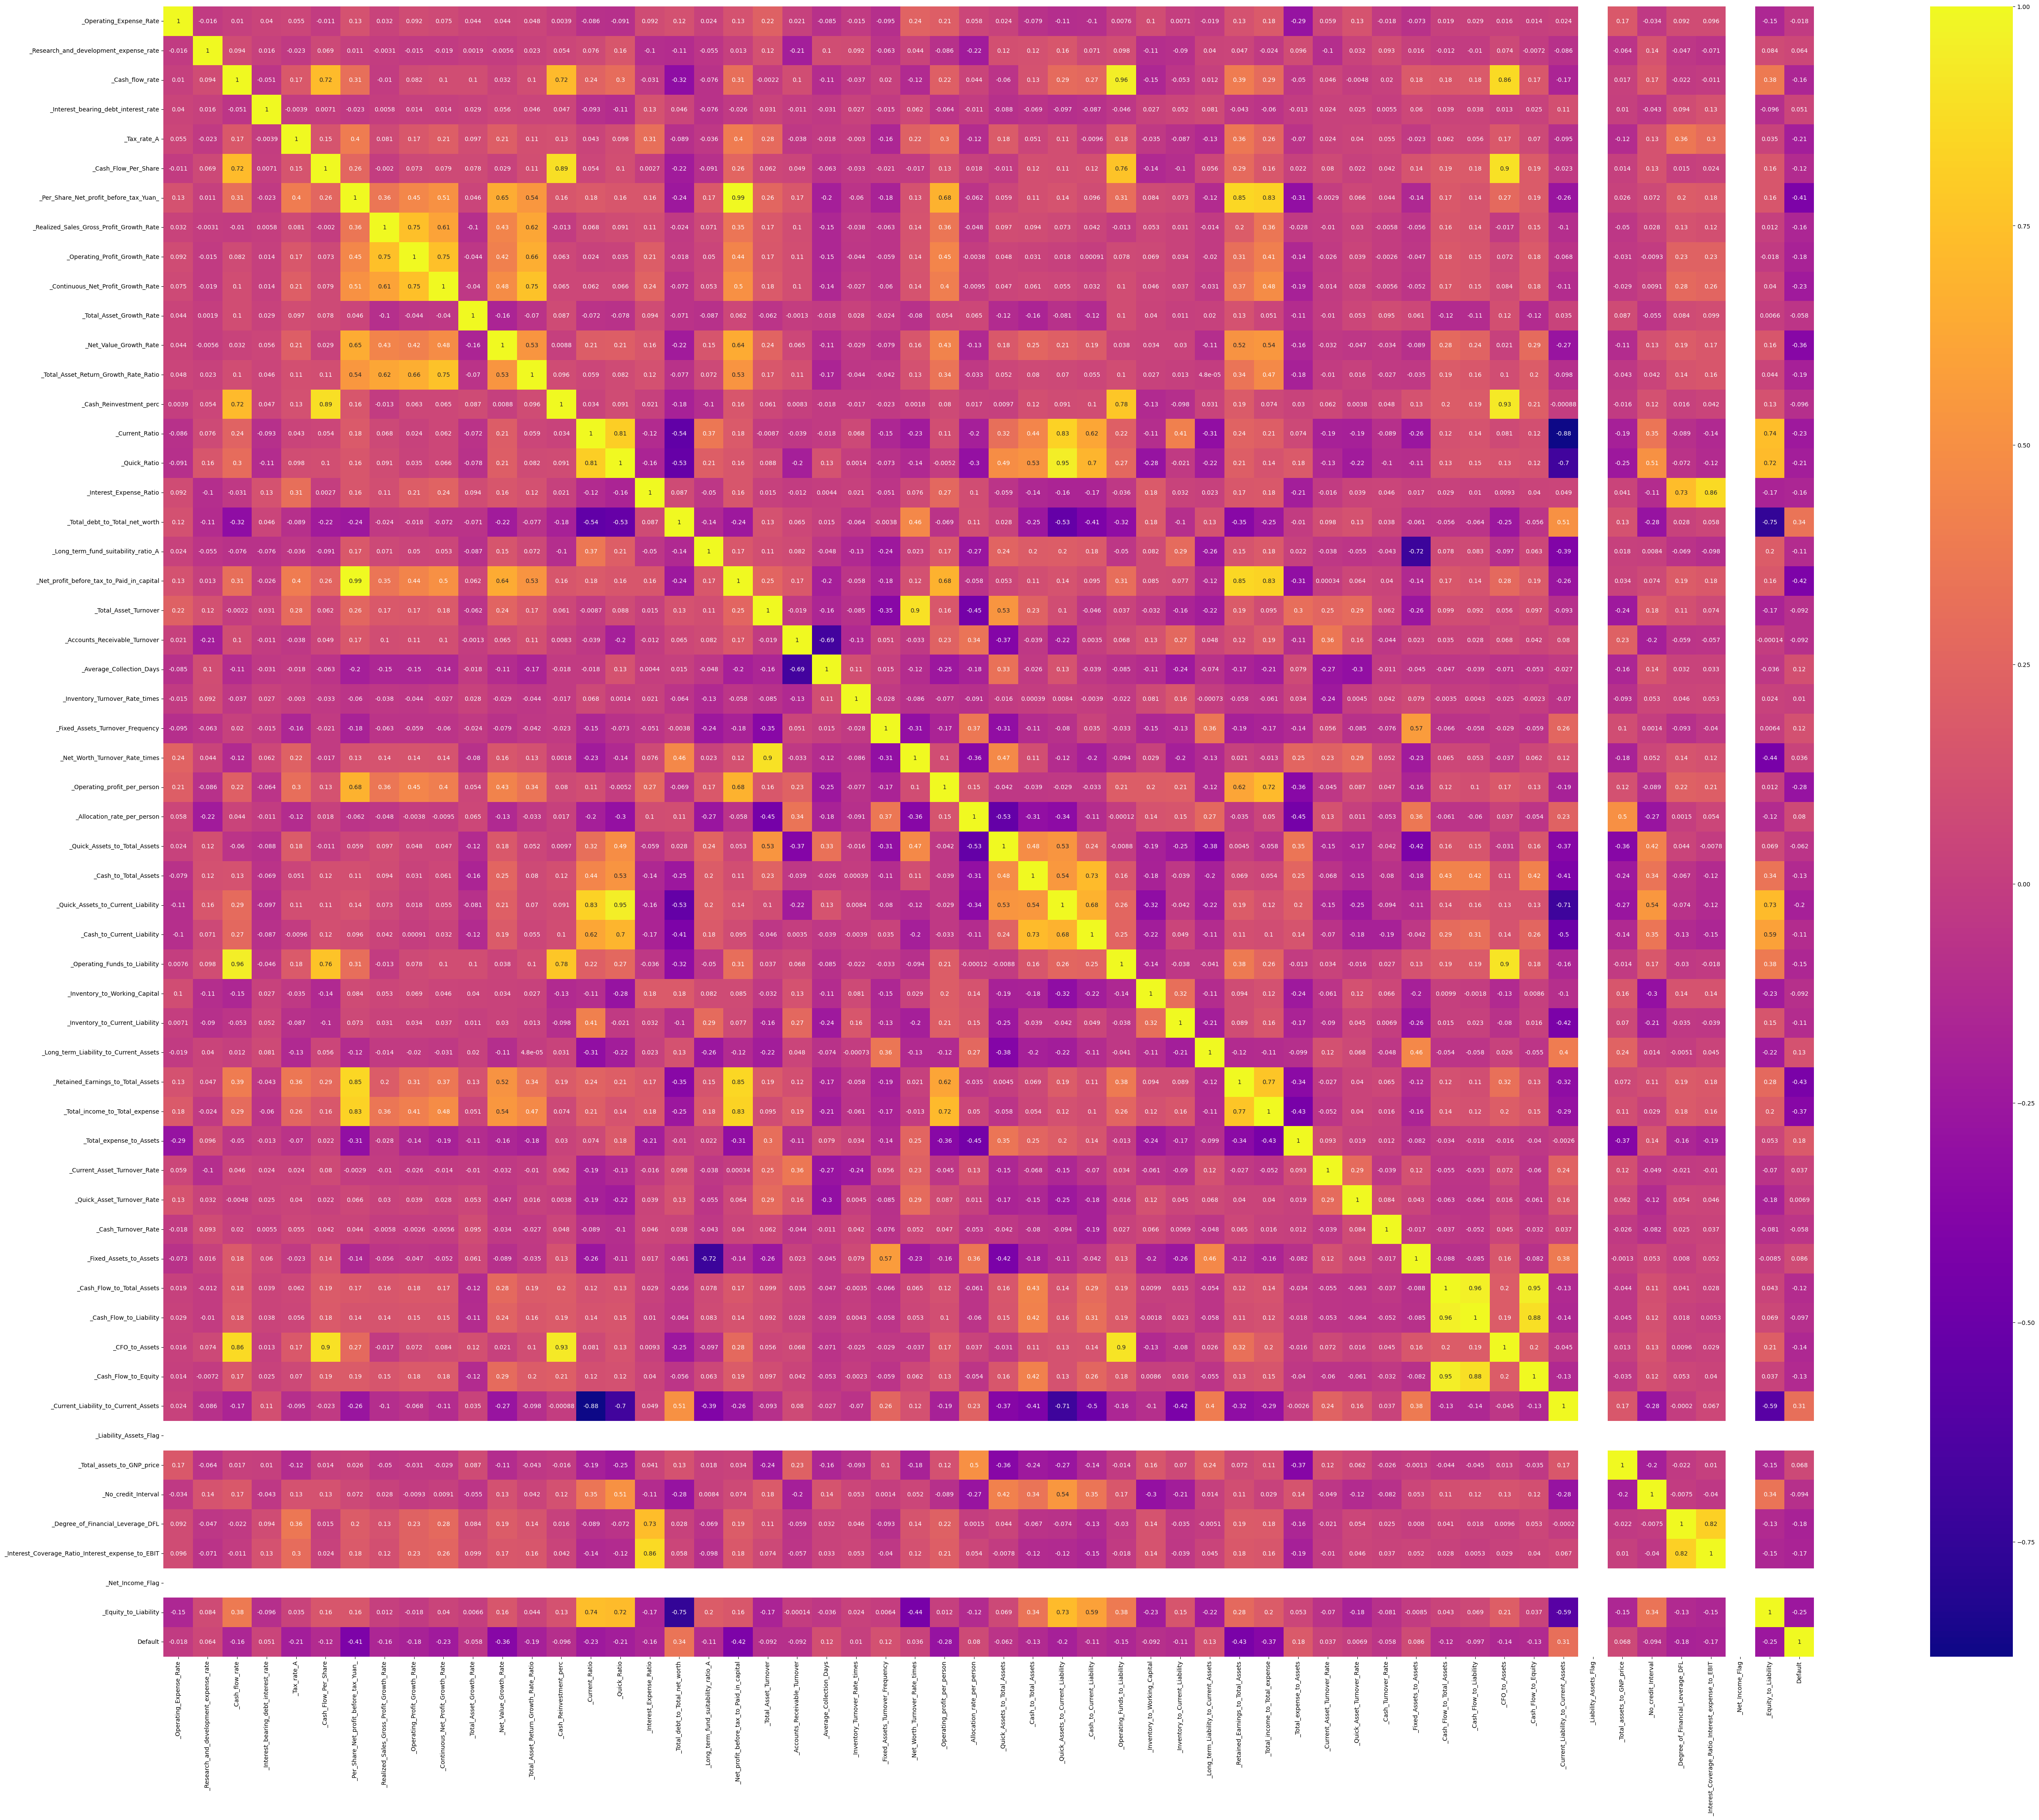

In [58]:
plt.figure(figsize=(70,50))
p=sns.heatmap(df1.corr(), annot=True,cmap='plasma',square=True)

# PART A: Build Logistic Regression Model (using statsmodels library) on most important variables on train dataset and choose the optimum cut-off. Also showcase your model building approach

## Model Building using Logistic Regression for 'Probability at default'
## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
y = 11+𝑒−𝑧
## Note: z = 𝛽0 +∑𝑛𝑖=1(𝛽𝑖𝑋1)
##Creating logistic regression equation & storing it in f_1
##model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’

In [59]:
import statsmodels.formula.api as SM

In [60]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [61]:
Default_train.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_', '_Total_Asset_Growth_Rate',
       '_Total_debt_to_Total_net_worth', '_Total_Asset_Turnover',
       '_Average_Collection_Days', '_Inventory_Turnover_Rate_times',
       '_Fixed_Assets_Turnover_Frequency', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to_Total_Assets',
       '_Cash_to_Total_Assets', '_Cash_to_Current_Liability',
       '_Inventory_to_Current_Liability',
       '_Long_term_Liability_to_Current_Assets', '_Total_expense_to_Assets',
       '_Quick_Asset_Turnover_Rate', '_Cash_Turnover_Rate',
       '_Fixed_Assets_to_Assets', '_Cash_Flow_to_Equity',
       '_Current_Liability_to_Current_Assets', '_Total_assets_to_GNP_price',
       '_Equity_to_Liability', 'Default'],
      dtype='object')

In [62]:
Default_train.describe()

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
count              1378.000000                             1378.000000   
mean                  0.013326                                0.018660   
std                   1.009646                                1.013705   
min                  -0.631148                               -0.645151   
25%                  -0.631148                               -0.645151   
50%                  -0.631148                               -0.645151   
75%                   0.664275                                0.536921   
max                   2.437890                                2.037441   

       _Cash_flow_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
count      1378.000000  1378.000000           1378.000000   
mean          0.004775    -0.003592             -0.000114   
std           1.001436     0.995435              1.017203   
min          -2.182514    -0.819217             -2.295062   
25%          -0.580803    -0.819217             -0.460039   
50%          -0.126258    -0.529895              0.000000   
75%           0.488841     0.769801              0.536143   
max           2.093814     3.188040              2.307857   

       _Per_Share_Net_profit_before_tax_Yuan_  _Total_Asset_Growth_Rate  \
count                             1378.000000               1378.000000   
mean                                 0.000068                 -0.042755   
std                                  0.995471                  1.007255   
min                                 -2.146209                 -1.815876   
25%                                 -0.555189                 -0.480841   
50%                                 -0.045728                  0.289273   
75%                                  0.526371                  0.625822   
max                                  2.129920                  1.611431   

       _Total_debt_to_Total_net_worth  _Total_Asset_Turnover  \
count                     1378.000000            1378.000000   
mean                         0.012000               0.031520   
std                          1.008053               1.008843   
min                         -1.306604              -1.480820   
25%                         -0.756064              -0.726342   
50%                         -0.260908              -0.205392   
75%                          0.532228               0.585014   
max                          2.472123               2.444266   

       _Average_Collection_Days  ...  _Long_term_Liability_to_Current_Assets  \
count               1378.000000  ...                             1378.000000   
mean                   0.007479  ...                                0.001002   
std                    0.995580  ...                                1.007217   
min                   -1.630643  ...                               -0.776160   
25%                   -0.710328  ...                               -0.776160   
50%                   -0.094454  ...                               -0.491587   
75%                    0.574870  ...                                0.417766   
max                    2.491474  ...                                2.216929   

       _Total_expense_to_Assets  _Quick_Asset_Turnover_Rate  \
count               1378.000000                 1378.000000   
mean                   0.022215                    0.003880   
std                    1.003479                    0.999531   
min                   -1.316999                   -0.744856   
25%                   -0.729817                   -0.744856   
50%                   -0.272292                   -0.744856   
75%                    0.479803                    0.929194   
max                    2.234492                    2.151424   

       _Cash_Turnover_Rate  _Fixed_Assets_to_Assets  _Cash_Flow_to_Equity  \
count          1378.000000              1378.000000           1378.000000   
mean             -0.000129                 0.018650              0.003052   
std              

In [63]:
m1= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Tax_rate_A + _Cash_Flow_Per_Share +_Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [64]:
model_1 = SM.logit(formula = m1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.198159
         Iterations 9


In [65]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1350
Method:                           MLE   Df Model:                           27
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4163
Time:                        01:46:57   Log-Likelihood:                -273.06
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 6.647e-66
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6114      0.216    -16.687      0.000      -4.036      -3.187
_Operating_Expense_Rate                    0.1583      0.132      1.202      0.230      -0.100       0.416
_Research_and_development_expense_rate     0.4418      0.117      3.784      0.000       0.213       0.671
_Cash_flow_rate                            0.0572      0.246      0.232      0.816      -0.425       0.540
_Tax_rate_A                               -0.0768      0.163     -0.472      0.637      -0.396       0.242
_Cash_Flow_Per_Share                      -0.0474      0.195     -0.243      0.808      -0.430       0.335
_Per_Share_Net_profit_before_tax_Yuan_    -1.0884      0.230     -4.733      0.000      -1.539      -0.638
_Total_Asset_Growth_Rate                  -0.0768      0.130     -0.591      0.554      -0.332       0.178
_Total_debt_to_Total_net_worth             0.4985      0.185      2.694      0.007       0.136       0.861
_Total_Asset_Turnover                     -0.2586      0.218     -1.186      0.236      -0.686       0.169
_Average_Collection_Days                   0.4102      0.137      2.987      0.003       0.141       0.679
_Inventory_Turnover_Rate_times             0.0386      0.123      0.313      0.754      -0.203       0.280
_Fixed_Assets_Turnover_Frequency           0.1620      0.146      1.108      0.268      -0.124       0.448
_Operating_profit_per_person               0.0451      0.175      0.258      0.796      -0.297       0.388
_Allocation_rate_per_person                0.0693      0.176      0.393      0.694      -0.277       0.415
_Quick_Assets_to_Total_Assets             -0.6669      0.259     -2.573      0.010      -1.175      -0.159
_Cash_to_Total_Assets                      0.0541      0.200      0.271      0.787      -0.338       0.446
_Cash_to_Current_Liability                 0.0531      0.168      0.315      0.753      -0.277       0.383
_Inventory_to_Current_Liability           -0.1028      0.207     -0.496      0.620      -0.509       0.304
_Long_term_Liability_to_Current_Assets    -0.1830      0.136     -1.349      0.177      -0.449       0.083
_Total_expense_to_Assets                   0.4449      0.165      2.700      0.007       0.122       0.768
_Quick_Asset_Turnover_Rate                -0.0245      0.136     -0.181      0.857      -0.291       0.242
_Cash_Turnover_Rate                       -0.3709      0.138     -2.687      0.007      -0.641      -0.100
_Fixed_Assets_to_Assets                   -0.1153      0.173     -0.666      0.505      -0.455       0.224
_Cash_Flow_to_Equity                      -0.1764      0.129     -1.372      0.170      -0.428       0.076
_Current_Liability_to_Current_Assets       0.1059      0.207      0.513      0.608      -0.299       0.511
_Total_assets_to_GNP_price                 0.0693      0.146      0.476      0.634      -0.216       0.354
_Equity_to_Liability           

## If the coef is positive and if value increases then will the prop of default increases prob of default, if coef is -ve and value increases then it will decrease the probability of default

## -1378 - The number of data points used to fit the model.
## -R-squared: 0.4163 - This is a measure of the goodness of fit of the model, indicating the
  proportion of variance explained by the model relative to a null model.
## -273.06 - The log-likelihood value represents the goodness of fit of the model, with higher values indicating better fit.
## -Variables with p-values less than the chosen significance level (typically 0.05) are considered statistically significant predictors of the outcome.
## -For instance, the variable '_Operating_Expense_Rate' has a coefficient of 0.1583 with a p-value of
##  0.230, suggesting that it is not statistically significant at the conventional significance level of 0.05. Therefore, it may not have a significant impact on predicting the likelihood of 'Default'.
## -Conversely, the variable '_Research_and_development_expense_rate' has a coefficient of 0.4418 with a p-value less than 0.001, indicating statistical significance. Thus, a one-unit increase in this variable is associated with an increase in the log odds of 'Default' by 0.4418 units, all else being equal.


## Lets drop "cash flow rate"

In [66]:
Default_train1= Default_train.drop('_Cash_flow_rate', axis = 1)

In [67]:
m2= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Cash_Flow_Per_Share +_Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'

In [68]:
model_2 = SM.logit(formula = m2, data=Default_train1).fit()

Optimization terminated successfully.
         Current function value: 0.198179
         Iterations 9


In [69]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1351
Method:                           MLE   Df Model:                           26
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4163
Time:                        01:46:57   Log-Likelihood:                -273.09
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.740e-66
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6149      0.217    -16.697      0.000      -4.039      -3.191
_Operating_Expense_Rate                    0.1583      0.132      1.202      0.230      -0.100       0.417
_Research_and_development_expense_rate     0.4435      0.117      3.805      0.000       0.215       0.672
_Tax_rate_A                               -0.0774      0.163     -0.475      0.635      -0.397       0.242
_Cash_Flow_Per_Share                      -0.0145      0.134     -0.109      0.913      -0.276       0.247
_Per_Share_Net_profit_before_tax_Yuan_    -1.0860      0.229     -4.734      0.000      -1.536      -0.636
_Total_Asset_Growth_Rate                  -0.0752      0.130     -0.580      0.562      -0.329       0.179
_Total_debt_to_Total_net_worth             0.5005      0.185      2.704      0.007       0.138       0.863
_Total_Asset_Turnover                     -0.2538      0.217     -1.171      0.242      -0.679       0.171
_Average_Collection_Days                   0.4096      0.137      2.982      0.003       0.140       0.679
_Inventory_Turnover_Rate_times             0.0394      0.123      0.320      0.749      -0.202       0.281
_Fixed_Assets_Turnover_Frequency           0.1600      0.146      1.097      0.273      -0.126       0.446
_Operating_profit_per_person               0.0480      0.174      0.276      0.783      -0.293       0.389
_Allocation_rate_per_person                0.0731      0.176      0.416      0.677      -0.271       0.417
_Quick_Assets_to_Total_Assets             -0.6674      0.259     -2.577      0.010      -1.175      -0.160
_Cash_to_Total_Assets                      0.0491      0.199      0.247      0.805      -0.341       0.439
_Cash_to_Current_Liability                 0.0559      0.168      0.333      0.739      -0.273       0.385
_Inventory_to_Current_Liability           -0.1046      0.208     -0.503      0.615      -0.512       0.303
_Long_term_Liability_to_Current_Assets    -0.1844      0.136     -1.360      0.174      -0.450       0.081
_Total_expense_to_Assets                   0.4426      0.164      2.693      0.007       0.120       0.765
_Quick_Asset_Turnover_Rate                -0.0235      0.136     -0.173      0.862      -0.289       0.242
_Cash_Turnover_Rate                       -0.3699      0.138     -2.680      0.007      -0.640      -0.099
_Fixed_Assets_to_Assets                   -0.1142      0.173     -0.659      0.510      -0.454       0.225
_Cash_Flow_to_Equity                      -0.1730      0.128     -1.355      0.175      -0.423       0.077
_Current_Liability_to_Current_Assets       0.1068      0.207      0.516      0.606      -0.299       0.513
_Total_assets_to_GNP_price                 0.0692      0.145      0.475      0.634      -0.216       0.354
_Equity_to_Liability                      -0.8424      0.339     -2.484      0.013      -1.507      -0.178
===============================

In [70]:
Default_train2= Default_train.drop('_Cash_Flow_Per_Share', axis = 1)

In [71]:
m3= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A +_Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'


In [72]:
model_3 = SM.logit(formula = m3, data=Default_train2).fit()

Optimization terminated successfully.
         Current function value: 0.198183
         Iterations 9


In [73]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1352
Method:                           MLE   Df Model:                           25
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4163
Time:                        01:46:58   Log-Likelihood:                -273.10
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 4.376e-67
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6144      0.216    -16.702      0.000      -4.039      -3.190
_Operating_Expense_Rate                    0.1579      0.132      1.198      0.231      -0.100       0.416
_Research_and_development_expense_rate     0.4428      0.116      3.805      0.000       0.215       0.671
_Tax_rate_A                               -0.0784      0.163     -0.482      0.630      -0.397       0.240
_Per_Share_Net_profit_before_tax_Yuan_    -1.0912      0.224     -4.863      0.000      -1.531      -0.651
_Total_Asset_Growth_Rate                  -0.0761      0.130     -0.587      0.557      -0.330       0.178
_Total_debt_to_Total_net_worth             0.5022      0.184      2.722      0.006       0.141       0.864
_Total_Asset_Turnover                     -0.2537      0.217     -1.170      0.242      -0.679       0.171
_Average_Collection_Days                   0.4096      0.137      2.983      0.003       0.141       0.679
_Inventory_Turnover_Rate_times             0.0402      0.123      0.326      0.744      -0.201       0.281
_Fixed_Assets_Turnover_Frequency           0.1614      0.145      1.110      0.267      -0.124       0.446
_Operating_profit_per_person               0.0500      0.173      0.289      0.773      -0.289       0.389
_Allocation_rate_per_person                0.0715      0.175      0.408      0.683      -0.272       0.415
_Quick_Assets_to_Total_Assets             -0.6690      0.259     -2.587      0.010      -1.176      -0.162
_Cash_to_Total_Assets                      0.0497      0.199      0.250      0.803      -0.340       0.440
_Cash_to_Current_Liability                 0.0565      0.168      0.337      0.736      -0.272       0.385
_Inventory_to_Current_Liability           -0.1045      0.208     -0.503      0.615      -0.511       0.303
_Long_term_Liability_to_Current_Assets    -0.1857      0.135     -1.374      0.169      -0.450       0.079
_Total_expense_to_Assets                   0.4403      0.163      2.702      0.007       0.121       0.760
_Quick_Asset_Turnover_Rate                -0.0240      0.136     -0.177      0.860      -0.290       0.242
_Cash_Turnover_Rate                       -0.3696      0.138     -2.678      0.007      -0.640      -0.099
_Fixed_Assets_to_Assets                   -0.1153      0.173     -0.667      0.505      -0.454       0.224
_Cash_Flow_to_Equity                      -0.1748      0.127     -1.381      0.167      -0.423       0.073
_Current_Liability_to_Current_Assets       0.1051      0.206      0.509      0.611      -0.299       0.510
_Total_assets_to_GNP_price                 0.0685      0.145      0.471      0.637      -0.216       0.353
_Equity_to_Liability                      -0.8437      0.339     -2.491      0.013      -1.508      -0.180
==========================================================================================================
"""

In [74]:
Default_train3= Default_train.drop('_Quick_Asset_Turnover_Rate', axis = 1)
m4= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A +_Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'
model_4 = SM.logit(formula = m4, data=Default_train3).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.198194
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1353
Method:                           MLE   Df Model:                           24
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4162
Time:                        01:46:58   Log-Likelihood:                -273.11
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.088e-67
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6154      0.216    -16.704      0.000      -4.040      -3.191
_Operating_Expense_Rate                    0.1566      0.132      1.191      0.234      -0.101       0.414
_Research_and_development_expense_rate     0.4415      0.116      3.802      0.000       0.214       0.669
_Tax_rate_A                               -0.0793      0.162     -0.488      0.625      -0.398       0.239
_Per_Share_Net_profit_before_tax_Yuan_    -1.0922      0.225     -4.865      0.000      -1.532      -0.652
_Total_Asset_Growth_Rate                  -0.0765      0.130     -0.590      0.555      -0.331       0.177
_Total_debt_to_Total_net_worth             0.4984      0.183      2.719      0.007       0.139       0.858
_Total_Asset_Turnover                     -0.2643      0.209     -1.267      0.205      -0.673       0.145
_Average_Collection_Days                   0.4141      0.135      3.067      0.002       0.150       0.679
_Inventory_Turnover_Rate_times             0.0387      0.123      0.315      0.753      -0.202       0.279
_Fixed_Assets_Turnover_Frequency           0.1604      0.145      1.104      0.270      -0.124       0.445
_Operating_profit_per_person               0.0505      0.173      0.292      0.771      -0.289       0.390
_Allocation_rate_per_person                0.0693      0.175      0.396      0.692      -0.273       0.412
_Quick_Assets_to_Total_Assets             -0.6617      0.255     -2.592      0.010      -1.162      -0.161
_Cash_to_Total_Assets                      0.0512      0.199      0.258      0.797      -0.338       0.441
_Cash_to_Current_Liability                 0.0566      0.168      0.337      0.736      -0.272       0.385
_Inventory_to_Current_Liability           -0.1036      0.208     -0.499      0.618      -0.511       0.303
_Long_term_Liability_to_Current_Assets    -0.1868      0.135     -1.385      0.166      -0.451       0.078
_Total_expense_to_Assets                   0.4378      0.162      2.697      0.007       0.120       0.756
_Cash_Turnover_Rate                       -0.3712      0.138     -2.693      0.007      -0.641      -0.101
_Fixed_Assets_to_Assets                   -0.1129      0.172     -0.655      0.512      -0.451       0.225
_Cash_Flow_to_Equity                      -0.1750      0.127     -1.383      0.167      -0.423       0.073
_Current_Liability_to_Current_Assets       0.1049      0.206      0.508      0.611      -0.300       0.509
_Total_assets_to_GNP_price                 0.0693      0.145      0.477      0.633      -0.215       0.354
_Equity_to_Liability                      -0.8468      0.339     -2.501      0.012      -1.510      -0.183
==========================================================================================================
"""

In [75]:
Default_train4= Default_train3.drop('_Operating_profit_per_person', axis = 1)
m5= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'
model_5 = SM.logit(formula = m5, data=Default_train4).fit()
model_5.summary()

Optimization terminated successfully.
         Current function value: 0.198225
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1354
Method:                           MLE   Df Model:                           23
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4161
Time:                        01:46:58   Log-Likelihood:                -273.15
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.716e-68
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6134      0.216    -16.732      0.000      -4.037      -3.190
_Operating_Expense_Rate                    0.1627      0.130      1.251      0.211      -0.092       0.418
_Research_and_development_expense_rate     0.4427      0.116      3.820      0.000       0.216       0.670
_Tax_rate_A                               -0.0738      0.161     -0.457      0.648      -0.390       0.242
_Per_Share_Net_profit_before_tax_Yuan_    -1.0570      0.189     -5.607      0.000      -1.426      -0.688
_Total_Asset_Growth_Rate                  -0.0766      0.130     -0.591      0.554      -0.331       0.177
_Total_debt_to_Total_net_worth             0.5007      0.183      2.738      0.006       0.142       0.859
_Total_Asset_Turnover                     -0.2709      0.207     -1.307      0.191      -0.677       0.135
_Average_Collection_Days                   0.4079      0.133      3.063      0.002       0.147       0.669
_Inventory_Turnover_Rate_times             0.0364      0.123      0.297      0.767      -0.204       0.276
_Fixed_Assets_Turnover_Frequency           0.1584      0.145      1.092      0.275      -0.126       0.443
_Allocation_rate_per_person                0.0642      0.174      0.369      0.712      -0.277       0.405
_Quick_Assets_to_Total_Assets             -0.6610      0.255     -2.589      0.010      -1.161      -0.161
_Cash_to_Total_Assets                      0.0486      0.199      0.245      0.807      -0.341       0.438
_Cash_to_Current_Liability                 0.0564      0.168      0.336      0.737      -0.273       0.386
_Inventory_to_Current_Liability           -0.1017      0.208     -0.490      0.624      -0.509       0.305
_Long_term_Liability_to_Current_Assets    -0.1896      0.134     -1.410      0.158      -0.453       0.074
_Total_expense_to_Assets                   0.4399      0.162      2.720      0.007       0.123       0.757
_Cash_Turnover_Rate                       -0.3681      0.137     -2.683      0.007      -0.637      -0.099
_Fixed_Assets_to_Assets                   -0.1104      0.172     -0.642      0.521      -0.448       0.227
_Cash_Flow_to_Equity                      -0.1746      0.126     -1.380      0.167      -0.422       0.073
_Current_Liability_to_Current_Assets       0.1015      0.206      0.493      0.622      -0.302       0.505
_Total_assets_to_GNP_price                 0.0730      0.145      0.505      0.614      -0.210       0.356
_Equity_to_Liability                      -0.8515      0.338     -2.522      0.012      -1.513      -0.190
==========================================================================================================
"""

In [76]:
Default_train5= Default_train4.drop('_Cash_to_Total_Assets', axis = 1)
m6= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'
model_6 = SM.logit(formula = m6, data=Default_train5).fit()
model_6.summary()

Optimization terminated successfully.
         Current function value: 0.198247
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1355
Method:                           MLE   Df Model:                           22
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4161
Time:                        01:46:58   Log-Likelihood:                -273.18
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 6.549e-69
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6099      0.215    -16.782      0.000      -4.032      -3.188
_Operating_Expense_Rate                    0.1604      0.130      1.236      0.216      -0.094       0.415
_Research_and_development_expense_rate     0.4447      0.116      3.848      0.000       0.218       0.671
_Tax_rate_A                               -0.0746      0.161     -0.462      0.644      -0.391       0.242
_Per_Share_Net_profit_before_tax_Yuan_    -1.0589      0.189     -5.616      0.000      -1.428      -0.689
_Total_Asset_Growth_Rate                  -0.0784      0.129     -0.606      0.544      -0.332       0.175
_Total_debt_to_Total_net_worth             0.4960      0.182      2.729      0.006       0.140       0.852
_Total_Asset_Turnover                     -0.2671      0.207     -1.291      0.197      -0.673       0.138
_Average_Collection_Days                   0.4012      0.131      3.073      0.002       0.145       0.657
_Inventory_Turnover_Rate_times             0.0364      0.123      0.297      0.766      -0.204       0.277
_Fixed_Assets_Turnover_Frequency           0.1591      0.145      1.097      0.272      -0.125       0.443
_Allocation_rate_per_person                0.0596      0.173      0.344      0.731      -0.280       0.399
_Quick_Assets_to_Total_Assets             -0.6441      0.246     -2.620      0.009      -1.126      -0.162
_Cash_to_Current_Liability                 0.0740      0.152      0.488      0.626      -0.223       0.371
_Inventory_to_Current_Liability           -0.0996      0.207     -0.481      0.630      -0.505       0.306
_Long_term_Liability_to_Current_Assets    -0.1883      0.134     -1.403      0.160      -0.451       0.075
_Total_expense_to_Assets                   0.4407      0.162      2.725      0.006       0.124       0.758
_Cash_Turnover_Rate                       -0.3627      0.135     -2.678      0.007      -0.628      -0.097
_Fixed_Assets_to_Assets                   -0.1077      0.172     -0.628      0.530      -0.444       0.229
_Cash_Flow_to_Equity                      -0.1652      0.121     -1.366      0.172      -0.402       0.072
_Current_Liability_to_Current_Assets       0.1010      0.206      0.491      0.623      -0.302       0.504
_Total_assets_to_GNP_price                 0.0744      0.144      0.515      0.606      -0.209       0.358
_Equity_to_Liability                      -0.8445      0.336     -2.516      0.012      -1.502      -0.187
==========================================================================================================
"""

In [77]:
Default_train6= Default_train5.drop('_Inventory_Turnover_Rate_times', axis = 1)
m7= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'
model_7 = SM.logit(formula = m7, data=Default_train6).fit()
model_7.summary()

Optimization terminated successfully.
         Current function value: 0.198279
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1356
Method:                           MLE   Df Model:                           21
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4160
Time:                        01:46:59   Log-Likelihood:                -273.23
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.563e-69
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6095      0.215    -16.779      0.000      -4.031      -3.188
_Operating_Expense_Rate                    0.1625      0.130      1.253      0.210      -0.092       0.417
_Research_and_development_expense_rate     0.4480      0.115      3.890      0.000       0.222       0.674
_Tax_rate_A                               -0.0723      0.161     -0.449      0.653      -0.388       0.243
_Per_Share_Net_profit_before_tax_Yuan_    -1.0612      0.189     -5.630      0.000      -1.431      -0.692
_Total_Asset_Growth_Rate                  -0.0780      0.129     -0.603      0.546      -0.332       0.176
_Total_debt_to_Total_net_worth             0.4902      0.181      2.713      0.007       0.136       0.844
_Total_Asset_Turnover                     -0.2710      0.207     -1.312      0.190      -0.676       0.134
_Average_Collection_Days                   0.4034      0.130      3.094      0.002       0.148       0.659
_Fixed_Assets_Turnover_Frequency           0.1572      0.145      1.086      0.277      -0.126       0.441
_Allocation_rate_per_person                0.0534      0.172      0.312      0.755      -0.283       0.390
_Quick_Assets_to_Total_Assets             -0.6457      0.246     -2.626      0.009      -1.128      -0.164
_Cash_to_Current_Liability                 0.0713      0.151      0.471      0.638      -0.225       0.368
_Inventory_to_Current_Liability           -0.0949      0.206     -0.461      0.645      -0.499       0.309
_Long_term_Liability_to_Current_Assets    -0.1867      0.134     -1.394      0.163      -0.449       0.076
_Total_expense_to_Assets                   0.4395      0.162      2.715      0.007       0.122       0.757
_Cash_Turnover_Rate                       -0.3627      0.135     -2.678      0.007      -0.628      -0.097
_Fixed_Assets_to_Assets                   -0.1019      0.170     -0.598      0.550      -0.436       0.232
_Cash_Flow_to_Equity                      -0.1637      0.121     -1.354      0.176      -0.401       0.073
_Current_Liability_to_Current_Assets       0.0962      0.205      0.470      0.638      -0.305       0.497
_Total_assets_to_GNP_price                 0.0715      0.144      0.497      0.619      -0.211       0.354
_Equity_to_Liability                      -0.8539      0.335     -2.552      0.011      -1.510      -0.198
==========================================================================================================
"""

In [78]:
Default_train7= Default_train6.drop('_Allocation_rate_per_person', axis = 1)
m8= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Tax_rate_A + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'
model_8 = SM.logit(formula = m8, data=Default_train7).fit()
model_8.summary()

Optimization terminated successfully.
         Current function value: 0.198314
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1357
Method:                           MLE   Df Model:                           20
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4159
Time:                        01:46:59   Log-Likelihood:                -273.28
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.655e-70
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6105      0.215    -16.780      0.000      -4.032      -3.189
_Operating_Expense_Rate                    0.1621      0.130      1.250      0.211      -0.092       0.416
_Research_and_development_expense_rate     0.4426      0.114      3.888      0.000       0.219       0.666
_Tax_rate_A                               -0.0717      0.161     -0.445      0.656      -0.387       0.244
_Per_Share_Net_profit_before_tax_Yuan_    -1.0642      0.188     -5.652      0.000      -1.433      -0.695
_Total_Asset_Growth_Rate                  -0.0773      0.129     -0.598      0.550      -0.331       0.176
_Total_debt_to_Total_net_worth             0.4963      0.180      2.760      0.006       0.144       0.849
_Total_Asset_Turnover                     -0.2824      0.203     -1.389      0.165      -0.681       0.116
_Average_Collection_Days                   0.4008      0.130      3.075      0.002       0.145       0.656
_Fixed_Assets_Turnover_Frequency           0.1656      0.142      1.167      0.243      -0.112       0.444
_Quick_Assets_to_Total_Assets             -0.6526      0.245     -2.662      0.008      -1.133      -0.172
_Cash_to_Current_Liability                 0.0768      0.150      0.512      0.608      -0.217       0.371
_Inventory_to_Current_Liability           -0.0929      0.206     -0.451      0.652      -0.496       0.311
_Long_term_Liability_to_Current_Assets    -0.1919      0.133     -1.444      0.149      -0.452       0.069
_Total_expense_to_Assets                   0.4276      0.157      2.723      0.006       0.120       0.735
_Cash_Turnover_Rate                       -0.3632      0.135     -2.681      0.007      -0.629      -0.098
_Fixed_Assets_to_Assets                   -0.0921      0.167     -0.551      0.582      -0.420       0.236
_Cash_Flow_to_Equity                      -0.1627      0.121     -1.348      0.178      -0.399       0.074
_Current_Liability_to_Current_Assets       0.0940      0.205      0.459      0.646      -0.307       0.495
_Total_assets_to_GNP_price                 0.0904      0.130      0.693      0.488      -0.165       0.346
_Equity_to_Liability                      -0.8593      0.335     -2.567      0.010      -1.515      -0.203
==========================================================================================================
"""

In [79]:
Default_train8= Default_train7.drop('_Tax_rate_A', axis = 1)
m9= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _Equity_to_Liability'
model_9 = SM.logit(formula = m9, data=Default_train8).fit()
model_9.summary()

Optimization terminated successfully.
         Current function value: 0.198389
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1358
Method:                           MLE   Df Model:                           19
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4157
Time:                        01:46:59   Log-Likelihood:                -273.38
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.768e-71
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6072      0.215    -16.802      0.000      -4.028      -3.186
_Operating_Expense_Rate                    0.1675      0.129      1.296      0.195      -0.086       0.421
_Research_and_development_expense_rate     0.4465      0.114      3.931      0.000       0.224       0.669
_Per_Share_Net_profit_before_tax_Yuan_    -1.0969      0.175     -6.282      0.000      -1.439      -0.755
_Total_Asset_Growth_Rate                  -0.0778      0.129     -0.602      0.547      -0.331       0.176
_Total_debt_to_Total_net_worth             0.5003      0.180      2.783      0.005       0.148       0.853
_Total_Asset_Turnover                     -0.2915      0.203     -1.439      0.150      -0.688       0.106
_Average_Collection_Days                   0.4007      0.131      3.067      0.002       0.145       0.657
_Fixed_Assets_Turnover_Frequency           0.1686      0.142      1.190      0.234      -0.109       0.446
_Quick_Assets_to_Total_Assets             -0.6597      0.245     -2.689      0.007      -1.141      -0.179
_Cash_to_Current_Liability                 0.0763      0.150      0.509      0.611      -0.218       0.370
_Inventory_to_Current_Liability           -0.0933      0.206     -0.453      0.651      -0.497       0.311
_Long_term_Liability_to_Current_Assets    -0.1908      0.133     -1.436      0.151      -0.451       0.070
_Total_expense_to_Assets                   0.4288      0.157      2.728      0.006       0.121       0.737
_Cash_Turnover_Rate                       -0.3649      0.136     -2.693      0.007      -0.631      -0.099
_Fixed_Assets_to_Assets                   -0.0974      0.167     -0.583      0.560      -0.425       0.230
_Cash_Flow_to_Equity                      -0.1617      0.121     -1.335      0.182      -0.399       0.076
_Current_Liability_to_Current_Assets       0.0909      0.205      0.444      0.657      -0.310       0.492
_Total_assets_to_GNP_price                 0.0870      0.130      0.669      0.504      -0.168       0.342
_Equity_to_Liability                      -0.8584      0.335     -2.563      0.010      -1.515      -0.202
==========================================================================================================
"""

In [80]:
Default_train9= Default_train8.drop('_Current_Liability_to_Current_Assets', axis = 1)
m10= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _Equity_to_Liability'
model_10 = SM.logit(formula = m10, data=Default_train9).fit()
model_10.summary()

Optimization terminated successfully.
         Current function value: 0.198460
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1359
Method:                           MLE   Df Model:                           18
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4155
Time:                        01:46:59   Log-Likelihood:                -273.48
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.039e-71
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6176      0.214    -16.886      0.000      -4.037      -3.198
_Operating_Expense_Rate                    0.1684      0.129      1.304      0.192      -0.085       0.421
_Research_and_development_expense_rate     0.4407      0.113      3.908      0.000       0.220       0.662
_Per_Share_Net_profit_before_tax_Yuan_    -1.1095      0.173     -6.427      0.000      -1.448      -0.771
_Total_Asset_Growth_Rate                  -0.0759      0.129     -0.588      0.556      -0.329       0.177
_Total_debt_to_Total_net_worth             0.5196      0.174      2.989      0.003       0.179       0.860
_Total_Asset_Turnover                     -0.2933      0.203     -1.444      0.149      -0.691       0.105
_Average_Collection_Days                   0.3999      0.131      3.059      0.002       0.144       0.656
_Fixed_Assets_Turnover_Frequency           0.1725      0.141      1.222      0.222      -0.104       0.449
_Quick_Assets_to_Total_Assets             -0.7122      0.217     -3.279      0.001      -1.138      -0.287
_Cash_to_Current_Liability                 0.0632      0.147      0.430      0.667      -0.225       0.351
_Inventory_to_Current_Liability           -0.1468      0.170     -0.865      0.387      -0.479       0.186
_Long_term_Liability_to_Current_Assets    -0.2012      0.131     -1.536      0.125      -0.458       0.056
_Total_expense_to_Assets                   0.4342      0.157      2.769      0.006       0.127       0.742
_Cash_Turnover_Rate                       -0.3648      0.135     -2.696      0.007      -0.630      -0.100
_Fixed_Assets_to_Assets                   -0.0832      0.165     -0.506      0.613      -0.406       0.239
_Cash_Flow_to_Equity                      -0.1582      0.121     -1.308      0.191      -0.395       0.079
_Total_assets_to_GNP_price                 0.0834      0.130      0.642      0.521      -0.171       0.338
_Equity_to_Liability                      -0.8937      0.326     -2.741      0.006      -1.533      -0.255
==========================================================================================================
"""

In [81]:
Default_train10= Default_train9.drop('_Cash_to_Current_Liability', axis = 1)
m11= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _Equity_to_Liability'
model_11 = SM.logit(formula = m11, data=Default_train10).fit()
model_11.summary()

Optimization terminated successfully.
         Current function value: 0.198527
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1360
Method:                           MLE   Df Model:                           17
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4153
Time:                        01:46:59   Log-Likelihood:                -273.57
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 4.578e-72
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6223      0.214    -16.892      0.000      -4.043      -3.202
_Operating_Expense_Rate                    0.1665      0.129      1.291      0.197      -0.086       0.419
_Research_and_development_expense_rate     0.4388      0.113      3.892      0.000       0.218       0.660
_Per_Share_Net_profit_before_tax_Yuan_    -1.1138      0.173     -6.453      0.000      -1.452      -0.775
_Total_Asset_Growth_Rate                  -0.0778      0.129     -0.603      0.546      -0.331       0.175
_Total_debt_to_Total_net_worth             0.5241      0.174      3.017      0.003       0.184       0.864
_Total_Asset_Turnover                     -0.2941      0.203     -1.447      0.148      -0.693       0.104
_Average_Collection_Days                   0.4036      0.130      3.094      0.002       0.148       0.659
_Fixed_Assets_Turnover_Frequency           0.1738      0.141      1.234      0.217      -0.102       0.450
_Quick_Assets_to_Total_Assets             -0.7050      0.217     -3.254      0.001      -1.130      -0.280
_Inventory_to_Current_Liability           -0.1364      0.168     -0.815      0.415      -0.465       0.192
_Long_term_Liability_to_Current_Assets    -0.2001      0.131     -1.529      0.126      -0.457       0.056
_Total_expense_to_Assets                   0.4362      0.157      2.784      0.005       0.129       0.743
_Cash_Turnover_Rate                       -0.3724      0.134     -2.773      0.006      -0.636      -0.109
_Fixed_Assets_to_Assets                   -0.0815      0.164     -0.497      0.619      -0.403       0.240
_Cash_Flow_to_Equity                      -0.1524      0.121     -1.264      0.206      -0.389       0.084
_Total_assets_to_GNP_price                 0.0859      0.130      0.663      0.507      -0.168       0.340
_Equity_to_Liability                      -0.8582      0.315     -2.723      0.006      -1.476      -0.240
==========================================================================================================
"""

In [82]:
Default_train11= Default_train10.drop('_Fixed_Assets_to_Assets', axis = 1)
m12= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_Asset_Growth_Rate + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _Equity_to_Liability'
model_12 = SM.logit(formula = m12, data=Default_train11).fit()
model_12.summary()

Optimization terminated successfully.
         Current function value: 0.198616
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1361
Method:                           MLE   Df Model:                           16
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4150
Time:                        01:46:59   Log-Likelihood:                -273.69
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.027e-72
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6176      0.214    -16.929      0.000      -4.036      -3.199
_Operating_Expense_Rate                    0.1678      0.129      1.301      0.193      -0.085       0.421
_Research_and_development_expense_rate     0.4397      0.113      3.903      0.000       0.219       0.661
_Per_Share_Net_profit_before_tax_Yuan_    -1.1101      0.172     -6.438      0.000      -1.448      -0.772
_Total_Asset_Growth_Rate                  -0.0791      0.129     -0.613      0.540      -0.332       0.174
_Total_debt_to_Total_net_worth             0.5212      0.174      2.999      0.003       0.181       0.862
_Total_Asset_Turnover                     -0.2987      0.204     -1.466      0.143      -0.698       0.101
_Average_Collection_Days                   0.4032      0.131      3.076      0.002       0.146       0.660
_Fixed_Assets_Turnover_Frequency           0.1425      0.126      1.127      0.260      -0.105       0.390
_Quick_Assets_to_Total_Assets             -0.6677      0.203     -3.285      0.001      -1.066      -0.269
_Inventory_to_Current_Liability           -0.1102      0.159     -0.695      0.487      -0.421       0.201
_Long_term_Liability_to_Current_Assets    -0.2166      0.127     -1.708      0.088      -0.465       0.032
_Total_expense_to_Assets                   0.4412      0.156      2.823      0.005       0.135       0.747
_Cash_Turnover_Rate                       -0.3709      0.134     -2.763      0.006      -0.634      -0.108
_Cash_Flow_to_Equity                      -0.1546      0.120     -1.283      0.199      -0.391       0.082
_Total_assets_to_GNP_price                 0.1013      0.126      0.806      0.420      -0.145       0.348
_Equity_to_Liability                      -0.8617      0.316     -2.729      0.006      -1.481      -0.243
==========================================================================================================
"""

In [83]:
Default_train12= Default_train11.drop('_Total_Asset_Growth_Rate', axis = 1)
m13= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _Equity_to_Liability'
model_13 = SM.logit(formula = m13, data=Default_train12).fit()
model_13.summary()

Optimization terminated successfully.
         Current function value: 0.198751
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1362
Method:                           MLE   Df Model:                           15
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4146
Time:                        01:47:00   Log-Likelihood:                -273.88
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.371e-73
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6143      0.213    -16.931      0.000      -4.033      -3.196
_Operating_Expense_Rate                    0.1700      0.129      1.318      0.188      -0.083       0.423
_Research_and_development_expense_rate     0.4357      0.112      3.882      0.000       0.216       0.656
_Per_Share_Net_profit_before_tax_Yuan_    -1.1184      0.173     -6.471      0.000      -1.457      -0.780
_Total_debt_to_Total_net_worth             0.5219      0.174      2.995      0.003       0.180       0.863
_Total_Asset_Turnover                     -0.2978      0.204     -1.458      0.145      -0.698       0.102
_Average_Collection_Days                   0.4050      0.132      3.079      0.002       0.147       0.663
_Fixed_Assets_Turnover_Frequency           0.1477      0.126      1.172      0.241      -0.099       0.395
_Quick_Assets_to_Total_Assets             -0.6619      0.203     -3.254      0.001      -1.061      -0.263
_Inventory_to_Current_Liability           -0.1083      0.159     -0.682      0.495      -0.419       0.203
_Long_term_Liability_to_Current_Assets    -0.2173      0.127     -1.714      0.087      -0.466       0.031
_Total_expense_to_Assets                   0.4459      0.156      2.862      0.004       0.141       0.751
_Cash_Turnover_Rate                       -0.3672      0.134     -2.741      0.006      -0.630      -0.105
_Cash_Flow_to_Equity                      -0.1502      0.120     -1.247      0.212      -0.386       0.086
_Total_assets_to_GNP_price                 0.0953      0.125      0.760      0.448      -0.151       0.341
_Equity_to_Liability                      -0.8584      0.316     -2.719      0.007      -1.477      -0.240
==========================================================================================================
"""

In [84]:
Default_train13= Default_train12.drop('_Inventory_to_Current_Liability', axis = 1)
m14= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Equity + _Total_assets_to_GNP_price + _Equity_to_Liability'
model_14 = SM.logit(formula = m14, data=Default_train13).fit()
model_14.summary()

Optimization terminated successfully.
         Current function value: 0.198922
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1363
Method:                           MLE   Df Model:                           14
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4141
Time:                        01:47:00   Log-Likelihood:                -274.12
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 5.546e-74
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6146      0.213    -16.954      0.000      -4.033      -3.197
_Operating_Expense_Rate                    0.1775      0.128      1.381      0.167      -0.074       0.429
_Research_and_development_expense_rate     0.4405      0.112      3.930      0.000       0.221       0.660
_Per_Share_Net_profit_before_tax_Yuan_    -1.1282      0.172     -6.547      0.000      -1.466      -0.790
_Total_debt_to_Total_net_worth             0.5178      0.174      2.976      0.003       0.177       0.859
_Total_Asset_Turnover                     -0.2898      0.203     -1.425      0.154      -0.688       0.109
_Average_Collection_Days                   0.4146      0.130      3.179      0.001       0.159       0.670
_Fixed_Assets_Turnover_Frequency           0.1675      0.122      1.368      0.171      -0.072       0.407
_Quick_Assets_to_Total_Assets             -0.6252      0.195     -3.200      0.001      -1.008      -0.242
_Long_term_Liability_to_Current_Assets    -0.1947      0.122     -1.594      0.111      -0.434       0.045
_Total_expense_to_Assets                   0.4583      0.155      2.958      0.003       0.155       0.762
_Cash_Turnover_Rate                       -0.3715      0.134     -2.780      0.005      -0.633      -0.110
_Cash_Flow_to_Equity                      -0.1564      0.120     -1.305      0.192      -0.391       0.078
_Total_assets_to_GNP_price                 0.0927      0.125      0.739      0.460      -0.153       0.339
_Equity_to_Liability                      -0.8719      0.314     -2.776      0.006      -1.487      -0.256
==========================================================================================================
"""

In [85]:
Default_train14= Default_train13.drop('_Total_assets_to_GNP_price', axis = 1)
m15= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Equity + _Equity_to_Liability'
model_15 = SM.logit(formula = m15, data=Default_train14).fit()
model_15.summary()

Optimization terminated successfully.
         Current function value: 0.199119
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           13
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4135
Time:                        01:47:00   Log-Likelihood:                -274.39
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.294e-74
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6219      0.214    -16.961      0.000      -4.040      -3.203
_Operating_Expense_Rate                    0.1966      0.126      1.564      0.118      -0.050       0.443
_Research_and_development_expense_rate     0.4374      0.112      3.908      0.000       0.218       0.657
_Per_Share_Net_profit_before_tax_Yuan_    -1.1386      0.172     -6.609      0.000      -1.476      -0.801
_Total_debt_to_Total_net_worth             0.5205      0.174      2.994      0.003       0.180       0.861
_Total_Asset_Turnover                     -0.3136      0.202     -1.556      0.120      -0.709       0.081
_Average_Collection_Days                   0.4059      0.130      3.112      0.002       0.150       0.662
_Fixed_Assets_Turnover_Frequency           0.1615      0.122      1.322      0.186      -0.078       0.401
_Quick_Assets_to_Total_Assets             -0.6306      0.196     -3.218      0.001      -1.015      -0.247
_Long_term_Liability_to_Current_Assets    -0.1831      0.121     -1.513      0.130      -0.420       0.054
_Total_expense_to_Assets                   0.4335      0.151      2.867      0.004       0.137       0.730
_Cash_Turnover_Rate                       -0.3685      0.133     -2.765      0.006      -0.630      -0.107
_Cash_Flow_to_Equity                      -0.1531      0.119     -1.285      0.199      -0.387       0.080
_Equity_to_Liability                      -0.8825      0.314     -2.809      0.005      -1.498      -0.267
==========================================================================================================
"""

In [86]:
Default_train15= Default_train14.drop('_Cash_Flow_to_Equity', axis = 1)
m16= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'
model_16 = SM.logit(formula = m16, data=Default_train15).fit()
model_16.summary()

Optimization terminated successfully.
         Current function value: 0.199720
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1365
Method:                           MLE   Df Model:                           12
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4117
Time:                        01:47:00   Log-Likelihood:                -275.21
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 4.988e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6154      0.213    -16.969      0.000      -4.033      -3.198
_Operating_Expense_Rate                    0.2018      0.125      1.609      0.108      -0.044       0.448
_Research_and_development_expense_rate     0.4301      0.112      3.856      0.000       0.211       0.649
_Per_Share_Net_profit_before_tax_Yuan_    -1.1706      0.171     -6.840      0.000      -1.506      -0.835
_Total_debt_to_Total_net_worth             0.5316      0.173      3.072      0.002       0.192       0.871
_Total_Asset_Turnover                     -0.2822      0.199     -1.418      0.156      -0.672       0.108
_Average_Collection_Days                   0.4288      0.128      3.349      0.001       0.178       0.680
_Fixed_Assets_Turnover_Frequency           0.1598      0.122      1.308      0.191      -0.080       0.399
_Quick_Assets_to_Total_Assets             -0.6727      0.192     -3.506      0.000      -1.049      -0.297
_Long_term_Liability_to_Current_Assets    -0.1818      0.121     -1.502      0.133      -0.419       0.055
_Total_expense_to_Assets                   0.4318      0.151      2.860      0.004       0.136       0.728
_Cash_Turnover_Rate                       -0.3666      0.132     -2.772      0.006      -0.626      -0.107
_Equity_to_Liability                      -0.8651      0.312     -2.773      0.006      -1.477      -0.254
==========================================================================================================
"""

In [87]:
Default_train16= Default_train15.drop('_Fixed_Assets_Turnover_Frequency', axis = 1)
m17= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Long_term_Liability_to_Current_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'
model_17 = SM.logit(formula = m17, data=Default_train16).fit()
model_17.summary()

Optimization terminated successfully.
         Current function value: 0.200340
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1366
Method:                           MLE   Df Model:                           11
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4099
Time:                        01:47:00   Log-Likelihood:                -276.07
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.891e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6108      0.213    -16.940      0.000      -4.029      -3.193
_Operating_Expense_Rate                    0.1937      0.125      1.553      0.121      -0.051       0.438
_Research_and_development_expense_rate     0.4359      0.112      3.908      0.000       0.217       0.654
_Per_Share_Net_profit_before_tax_Yuan_    -1.2109      0.169     -7.148      0.000      -1.543      -0.879
_Total_debt_to_Total_net_worth             0.5354      0.173      3.095      0.002       0.196       0.874
_Total_Asset_Turnover                     -0.3209      0.198     -1.619      0.106      -0.710       0.068
_Average_Collection_Days                   0.4336      0.128      3.400      0.001       0.184       0.684
_Quick_Assets_to_Total_Assets             -0.6938      0.191     -3.634      0.000      -1.068      -0.320
_Long_term_Liability_to_Current_Assets    -0.1274      0.113     -1.126      0.260      -0.349       0.094
_Total_expense_to_Assets                   0.3975      0.149      2.670      0.008       0.106       0.689
_Cash_Turnover_Rate                       -0.3727      0.132     -2.826      0.005      -0.631      -0.114
_Equity_to_Liability                      -0.8299      0.309     -2.684      0.007      -1.436      -0.224
==========================================================================================================
"""

In [88]:
Default_train17= Default_train16.drop('_Long_term_Liability_to_Current_Assets', axis = 1)
m18= 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'
model_18 = SM.logit(formula = m18, data=Default_train17).fit()
model_18.summary()

Optimization terminated successfully.
         Current function value: 0.200805
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1367
Method:                           MLE   Df Model:                           10
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4085
Time:                        01:47:00   Log-Likelihood:                -276.71
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 5.562e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.5950      0.211    -17.013      0.000      -4.009      -3.181
_Operating_Expense_Rate                    0.1975      0.125      1.585      0.113      -0.047       0.442
_Research_and_development_expense_rate     0.4144      0.110      3.782      0.000       0.200       0.629
_Per_Share_Net_profit_before_tax_Yuan_    -1.1921      0.168     -7.079      0.000      -1.522      -0.862
_Total_debt_to_Total_net_worth             0.5348      0.173      3.095      0.002       0.196       0.873
_Total_Asset_Turnover                     -0.3177      0.198     -1.604      0.109      -0.706       0.070
_Average_Collection_Days                   0.4329      0.128      3.388      0.001       0.183       0.683
_Quick_Assets_to_Total_Assets             -0.6299      0.181     -3.480      0.001      -0.985      -0.275
_Total_expense_to_Assets                   0.4102      0.149      2.758      0.006       0.119       0.702
_Cash_Turnover_Rate                       -0.3611      0.132     -2.736      0.006      -0.620      -0.102
_Equity_to_Liability                      -0.7906      0.306     -2.587      0.010      -1.390      -0.192
==========================================================================================================
"""

In [89]:
Default_train18= Default_train17.drop('_Operating_Expense_Rate', axis = 1)
m19= 'Default ~ + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Total_Asset_Turnover + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'
model_19 = SM.logit(formula = m19, data=Default_train18).fit()
model_19.summary()

Optimization terminated successfully.
         Current function value: 0.201695
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1368
Method:                           MLE   Df Model:                            9
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4059
Time:                        01:47:01   Log-Likelihood:                -277.94
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.760e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.5721      0.209    -17.119      0.000      -3.981      -3.163
_Research_and_development_expense_rate     0.4101      0.109      3.776      0.000       0.197       0.623
_Per_Share_Net_profit_before_tax_Yuan_    -1.2009      0.168     -7.162      0.000      -1.530      -0.872
_Total_debt_to_Total_net_worth             0.5454      0.172      3.167      0.002       0.208       0.883
_Total_Asset_Turnover                     -0.2232      0.187     -1.193      0.233      -0.590       0.143
_Average_Collection_Days                   0.4248      0.127      3.338      0.001       0.175       0.674
_Quick_Assets_to_Total_Assets             -0.6237      0.180     -3.472      0.001      -0.976      -0.272
_Total_expense_to_Assets                   0.3432      0.141      2.430      0.015       0.066       0.620
_Cash_Turnover_Rate                       -0.3769      0.131     -2.873      0.004      -0.634      -0.120
_Equity_to_Liability                      -0.7799      0.303     -2.575      0.010      -1.374      -0.186
==========================================================================================================
"""

In [90]:
Default_train19= Default_train18.drop('_Total_Asset_Turnover', axis = 1)
m20= 'Default ~ + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'
model_20 = SM.logit(formula = m20, data=Default_train19).fit()
model_20.summary()

Optimization terminated successfully.
         Current function value: 0.202215
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1369
Method:                           MLE   Df Model:                            8
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4044
Time:                        01:47:01   Log-Likelihood:                -278.65
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 7.844e-77
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.5587      0.208    -17.150      0.000      -3.965      -3.152
_Research_and_development_expense_rate     0.3860      0.107      3.618      0.000       0.177       0.595
_Per_Share_Net_profit_before_tax_Yuan_    -1.2530      0.162     -7.723      0.000      -1.571      -0.935
_Total_debt_to_Total_net_worth             0.5352      0.173      3.101      0.002       0.197       0.874
_Average_Collection_Days                   0.4937      0.113      4.362      0.000       0.272       0.716
_Quick_Assets_to_Total_Assets             -0.7536      0.145     -5.215      0.000      -1.037      -0.470
_Total_expense_to_Assets                   0.3025      0.137      2.215      0.027       0.035       0.570
_Cash_Turnover_Rate                       -0.3876      0.132     -2.939      0.003      -0.646      -0.129
_Equity_to_Liability                      -0.7409      0.302     -2.454      0.014      -1.333      -0.149
==========================================================================================================
"""

In [91]:
Default_train20= Default_train19.drop('_Total_expense_to_Assets', axis = 1)
m21= 'Default ~ + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Cash_Turnover_Rate + _Equity_to_Liability'
model_21 = SM.logit(formula = m21, data=Default_train20).fit()
model_21.summary()

Optimization terminated successfully.
         Current function value: 0.203930
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1370
Method:                           MLE   Df Model:                            7
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.3993
Time:                        01:47:01   Log-Likelihood:                -281.02
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 1.058e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.5876      0.208    -17.263      0.000      -3.995      -3.180
_Research_and_development_expense_rate     0.3931      0.107      3.680      0.000       0.184       0.602
_Per_Share_Net_profit_before_tax_Yuan_    -1.4582      0.142    -10.290      0.000      -1.736      -1.180
_Total_debt_to_Total_net_worth             0.4777      0.169      2.824      0.005       0.146       0.809
_Average_Collection_Days                   0.4464      0.111      4.005      0.000       0.228       0.665
_Quick_Assets_to_Total_Assets             -0.6328      0.131     -4.814      0.000      -0.890      -0.375
_Cash_Turnover_Rate                       -0.3714      0.130     -2.848      0.004      -0.627      -0.116
_Equity_to_Liability                      -0.7266      0.298     -2.441      0.015      -1.310      -0.143
==========================================================================================================
"""

In [92]:
Default_train21= Default_train20.drop('_Equity_to_Liability', axis = 1)
m22= 'Default ~ + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Average_Collection_Days + _Quick_Assets_to_Total_Assets + _Cash_Turnover_Rate'
model_22 = SM.logit(formula = m22, data=Default_train21).fit()
model_22.summary()

Optimization terminated successfully.
         Current function value: 0.206878
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                            6
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.3907
Time:                        01:47:01   Log-Likelihood:                -285.08
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 7.131e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.4252      0.184    -18.661      0.000      -3.785      -3.065
_Research_and_development_expense_rate     0.4015      0.106      3.792      0.000       0.194       0.609
_Per_Share_Net_profit_before_tax_Yuan_    -1.4594      0.140    -10.405      0.000      -1.734      -1.185
_Total_debt_to_Total_net_worth             0.8104      0.107      7.572      0.000       0.601       1.020
_Average_Collection_Days                   0.4498      0.110      4.088      0.000       0.234       0.665
_Quick_Assets_to_Total_Assets             -0.6683      0.130     -5.131      0.000      -0.924      -0.413
_Cash_Turnover_Rate                       -0.3462      0.129     -2.684      0.007      -0.599      -0.093
==========================================================================================================
"""

In [93]:
Default_train22= Default_train21.drop('_Cash_Turnover_Rate', axis = 1)
m23= 'Default ~ + _Research_and_development_expense_rate + _Per_Share_Net_profit_before_tax_Yuan_ + _Total_debt_to_Total_net_worth + _Average_Collection_Days + _Quick_Assets_to_Total_Assets'
model_23 = SM.logit(formula = m23, data=Default_train22).fit()
model_23.summary()

Optimization terminated successfully.
         Current function value: 0.209689
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1372
Method:                           MLE   Df Model:                            5
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.3824
Time:                        01:47:01   Log-Likelihood:                -288.95
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.687e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.3813      0.180    -18.835      0.000      -3.733      -3.029
_Research_and_development_expense_rate     0.3338      0.103      3.247      0.001       0.132       0.535
_Per_Share_Net_profit_before_tax_Yuan_    -1.4702      0.139    -10.552      0.000      -1.743      -1.197
_Total_debt_to_Total_net_worth             0.7801      0.106      7.386      0.000       0.573       0.987
_Average_Collection_Days                   0.4710      0.110      4.296      0.000       0.256       0.686
_Quick_Assets_to_Total_Assets             -0.6475      0.129     -5.008      0.000      -0.901      -0.394
==========================================================================================================
"""

# PART A: Validate the Model on Test Dataset and state the performance metrics. Also state interpretation from the model

# Logistic Regression

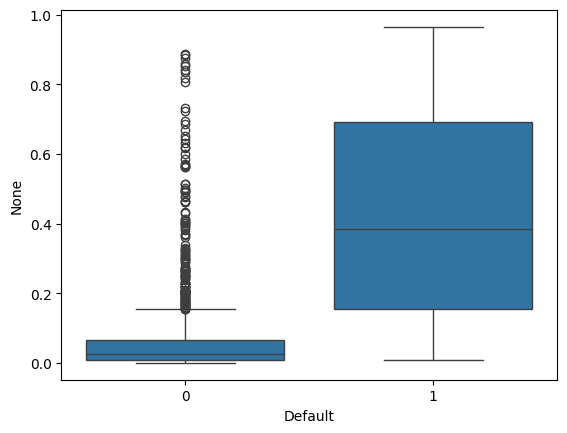

In [94]:
y_p_pred_24 = model_23.predict(Default_train22)
sns.boxplot(x=Default_train22['Default'],y=y_p_pred_24)
plt.xlabel('Default');

## Choosing Optimal Threshold

In [95]:
y_p_pred_train = model_23.predict(Default_train22)
y_p_pred_train.round(3)

2011    0.110
697     0.009
160     0.064
1273    0.040
541     0.104
        ...  
1386    0.015
1127    0.006
950     0.020
1058    0.025
562     0.249
Length: 1378, dtype: float64

In [96]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train22['Default'],y_p_pred_24)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("the optimal threshold =", optimal_threshold)

the optimal threshold = 0.1072017973601675


In [97]:
#Let us now see the predicted classes
y_class_pred=[]
for i in range(0,len(y_p_pred_train)):
    if np.array(y_p_pred_train)[i]>0.10759070415451749:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [98]:
from sklearn import metrics

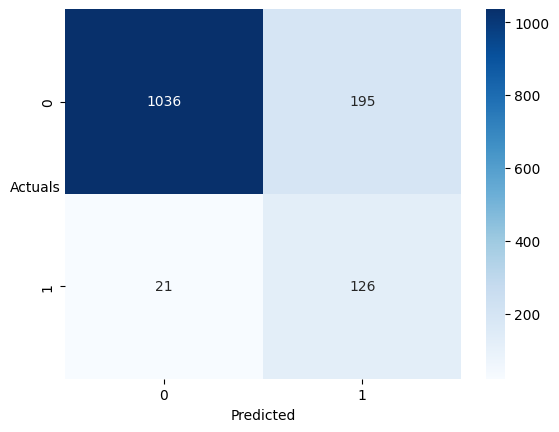

In [99]:
sns.heatmap((metrics.confusion_matrix(Default_train22['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## Recall = True positive / True postive+ false negitive


In [100]:
R=126/147
print(" Precision of the model", R)

 Precision of the model 0.8571428571428571


## Precision = True Positive/ True positive + False Positive

In [101]:
p = 126/321
print(" Precision of the model", p)

 Precision of the model 0.3925233644859813


In [102]:
y_p_pred_train = model_23.predict(Default_train22)
y_p_pred_train.round(3)

2011    0.110
697     0.009
160     0.064
1273    0.040
541     0.104
        ...  
1386    0.015
1127    0.006
950     0.020
1058    0.025
562     0.249
Length: 1378, dtype: float64

## High Recall (85%):
## The model has a high recall, indicating that it effectively identifies most of the instances of 'Default' in the dataset. This suggests that the model is good at capturing instances of 'Default', minimizing false negatives. In other words, it correctly identifies a large portion of companies that are likely to default on their loans.
## Low Precision (35%):
## Despite the high recall, the model has a relatively low precision. This means that among the instances predicted as 'Default' by the model, only 35% of them are true positives. In other words, there is a significant number of false positives among the instances predicted as 'Default' by the model.
Inference:

## The high recall indicates that the model is sensitive to identifying instances of 'Default' and is effective in capturing most of them.
## However, the low precision suggests that the model may be overly aggressive in predicting 'Default', leading to a considerable number of false positives.
## Therefore, while the model is good at identifying companies at risk of defaulting, it also misclassifies a substantial number of non-default cases as default, which could lead to unnecessary actions or interventions.

In [103]:
confusion_matrix = metrics.confusion_matrix(Default_train22['Default'], y_class_pred)
confusion_matrix

array([[1036,  195],
       [  21,  126]])

In [104]:
print(metrics.classification_report(Default_train22['Default'],y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1231
           1       0.39      0.86      0.54       147

    accuracy                           0.84      1378
   macro avg       0.69      0.85      0.72      1378
weighted avg       0.92      0.84      0.87      1378



In [105]:
# predicted probability values on test dataset
y_prob_pred_test = model_23.predict(Default_test)
y_prob_pred_test.round(3)

974     0.005
134     0.023
1267    0.023
464     0.003
579     0.008
        ...  
1792    0.080
443     0.069
621     0.017
518     0.005
2057    0.023
Length: 680, dtype: float64

In [106]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.10759070415451749:
        a=1
    else:
        a=0
    y_class_pred.append(a)

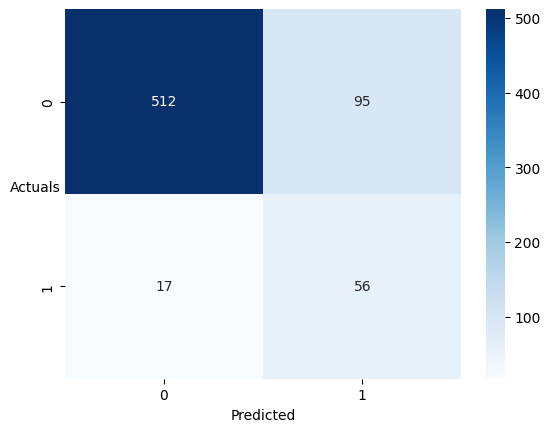

In [107]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [108]:
r = 56/73
print("recall is =", r)

recall is = 0.7671232876712328


In [109]:
p = 56/151
print("precision is =", p)

precision is = 0.3708609271523179


In [110]:
confusion_matrix = metrics.confusion_matrix(Default_test['Default'], y_class_pred)
confusion_matrix

array([[512,  95],
       [ 17,  56]])

In [111]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.968     0.843     0.901       607
           1      0.371     0.767     0.500        73

    accuracy                          0.835       680
   macro avg      0.669     0.805     0.701       680
weighted avg      0.904     0.835     0.858       680



In [112]:
y_prob_pred_train = model_23.predict(Default_train22)
y_true_train = Default_train['Default']
y_prob_pred_test = model_23.predict(Default_test)
y_true_test = Default_test['Default']

In [163]:
import matplotlib.pyplot as plt
from sklearn import metrics

AUC for the Training Data: 0.861
AUC for the Test Data: 0.808


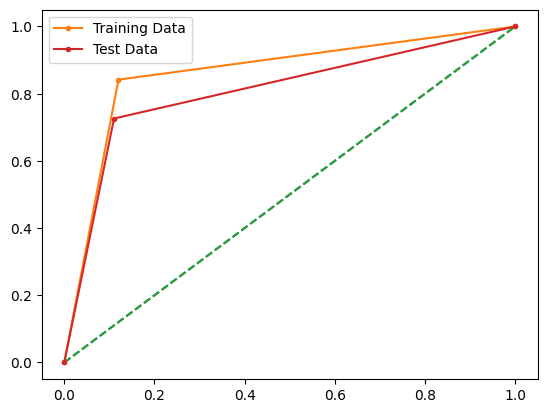

In [162]:
auc_train1 = metrics.roc_auc_score(y_train_res, pred_train_smote)
print('AUC for the Training Data: %.3f' % auc_train1)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_res, pred_train_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data')
auc_test = metrics.roc_auc_score(y_test, pred_test_smote)
print('AUC for the Test Data: %.3f' % auc_test)
# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, pred_test_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on test data
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data')
plt.legend(loc='best')
plt.show()

# PART A: Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [114]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [115]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 45,
 'n_estimators': 50}

In [116]:
best_grid = grid_search.best_estimator_

In [117]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [118]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1231
           1       0.90      0.38      0.54       147

    accuracy                           0.93      1378
   macro avg       0.92      0.69      0.75      1378
weighted avg       0.93      0.93      0.92      1378



In [119]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       607
           1       0.80      0.33      0.47        73

    accuracy                           0.92       680
   macro avg       0.86      0.66      0.71       680
weighted avg       0.91      0.92      0.90       680



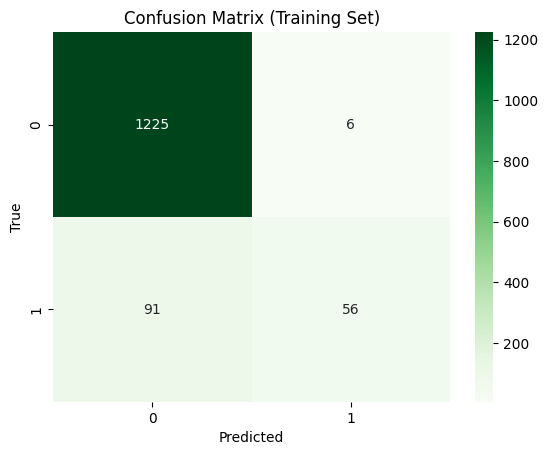

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for training set predictions
cm_train = confusion_matrix(y_train, pred_train_rf)

# Create heatmap
sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Set)')
plt.show()


In [121]:
r = 79/147
r

0.5374149659863946

In [122]:
p =  79/ 83
p

0.9518072289156626

In [123]:
cm_train = confusion_matrix(y_train, pred_train_rf)
cm_train

array([[1225,    6],
       [  91,   56]])

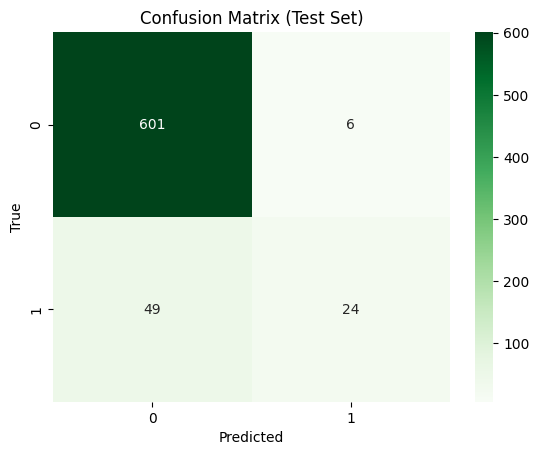

In [124]:
cm_test = confusion_matrix(y_test, pred_test_rf)
sns.heatmap(cm_test, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [125]:
r= 23/73
r

0.3150684931506849

In [126]:
p=23/ 34
p

0.6764705882352942

## -Here after performing logistic regression, the model which we are working on turned out to be overfitting as the recall in training showed 54% recall where as the recall in the test has showed only 31% recall
## - This also says that the model not accurate and can't be hightly relied on
## - The precesion looks pretty good in both the train and test data
## - among the 2 models we have performed above Logistic regression seems to have a bette performance.

In [127]:
cm_test = confusion_matrix(y_test, pred_test_rf)
cm_test

array([[601,   6],
       [ 49,  24]])

AUC for the Training Data: 0.958
AUC for the Test Data: 0.912


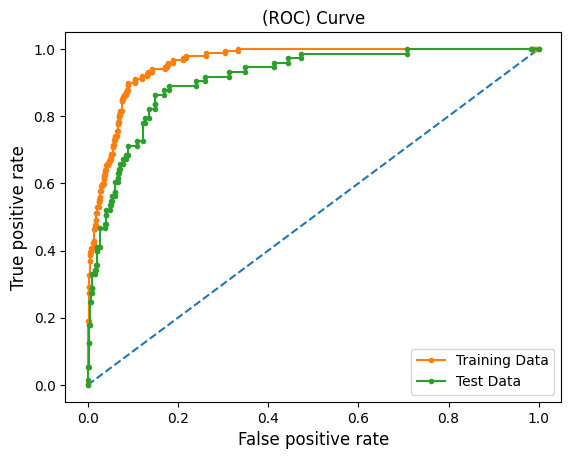

In [128]:
# AUC and ROC for the training data
# Predict probabilities
probs_train = best_grid.predict_proba(X_train)
# Keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# Calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)
# Calculate ROC curve for training data
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(train_fpr, train_tpr, marker='.', label='Training Data')
# AUC and ROC for the test data
# Predict probabilities
probs_test = best_grid.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# Calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)
# Calculate ROC curve for test data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
# Plot the ROC curve for the model on test data
plt.plot(test_fpr, test_tpr, marker='.', label='Test Data')
# Show the legend
plt.legend(loc='best')
# Set labels and title
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('(ROC) Curve')
# Show the plot
plt.show()

AUC for the Test Data: 0.912


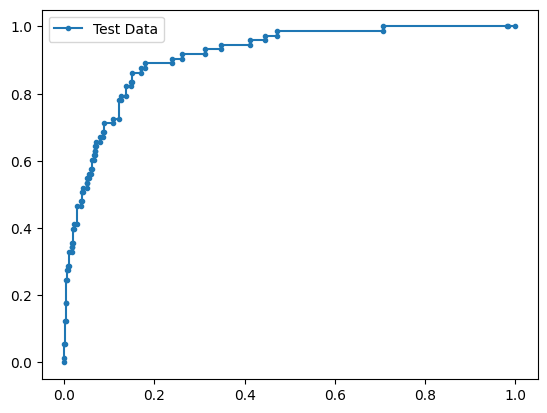

In [129]:
# Calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve for test data
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
# Plot the ROC curve for the model on test data
plt.plot(test_fpr, test_tpr, marker='.', label='Test Data')

# Show the legend
plt.legend(loc='best');

# PART A: Build a LDA Model on Train Dataset. Also showcase your model building approach

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [131]:
LDA = LinearDiscriminantAnalysis()

In [132]:
lda_model = LDA.fit(X_train, y_train)

In [133]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1231
           1       0.64      0.50      0.56       147

    accuracy                           0.92      1378
   macro avg       0.79      0.73      0.76      1378
weighted avg       0.91      0.92      0.91      1378



In [134]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       607
           1       0.59      0.48      0.53        73

    accuracy                           0.91       680
   macro avg       0.77      0.72      0.74       680
weighted avg       0.90      0.91      0.90       680



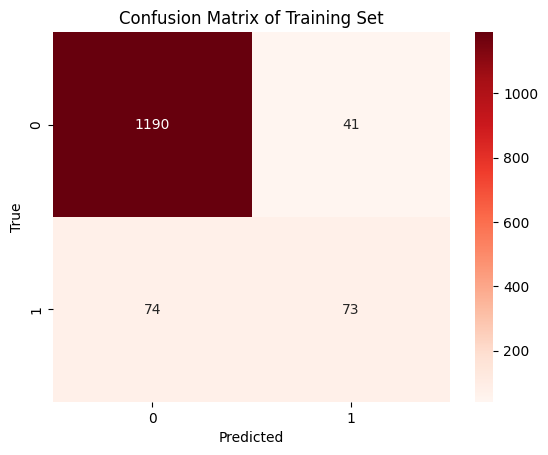

In [135]:
cm_train = confusion_matrix(y_train, pred_train_lda)
sns.heatmap(cm_train, annot=True, cmap='Reds', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Training Set')
plt.show()

In [136]:
r =73/ 147
print("recall  of train set =", r)

recall  of train set = 0.4965986394557823


In [137]:
p = 73/ 114
print("precision of train set =", p)

precision of train set = 0.6403508771929824


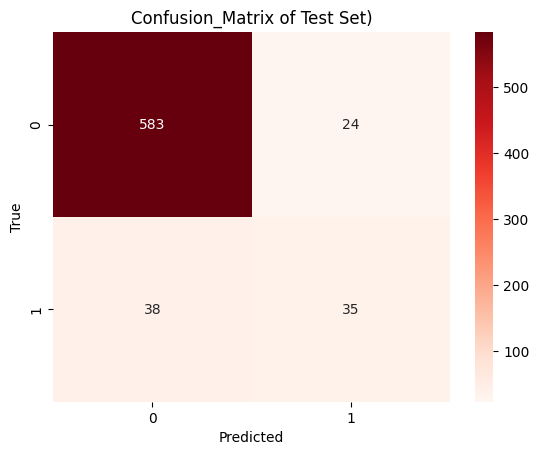

In [138]:
cm_test = confusion_matrix(y_test, pred_test_lda)

# Plot confusion matrix for test set
sns.heatmap(cm_test, annot=True, cmap='Reds', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion_Matrix of Test Set)')
plt.show()

In [139]:
recall= 35/73
recall

0.4794520547945205

In [140]:
p = 35/59
print("Precision of test set = ",p)

Precision of test set =  0.5932203389830508


AUC for the Training Data: 0.921
AUC for the Test Data: 0.893


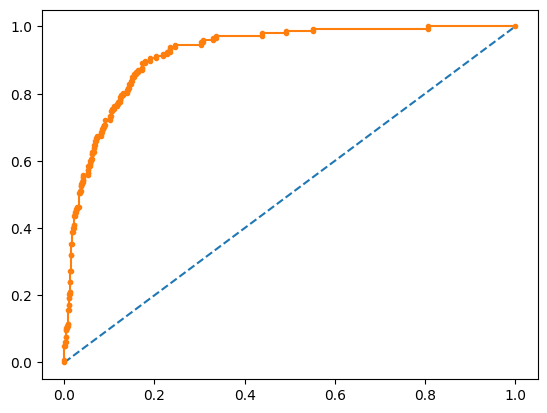

In [141]:
probs_train = lda_model.predict_proba(X_train)
# Keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]

# Calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data')
probs_test = lda_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)
# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)

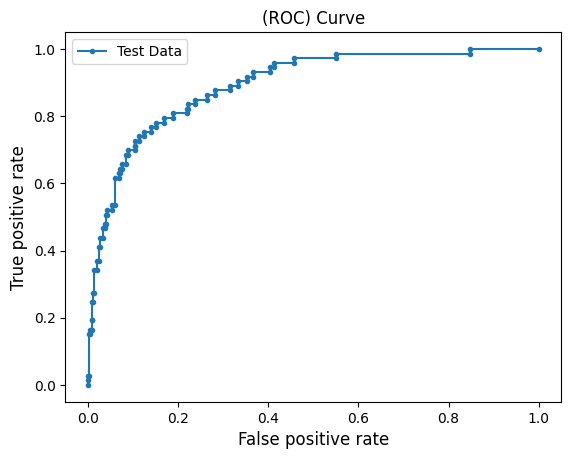

In [142]:
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data')
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('(ROC) Curve')
plt.legend(loc='best')
plt.show()

In [143]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [144]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [145]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.06377490357761831

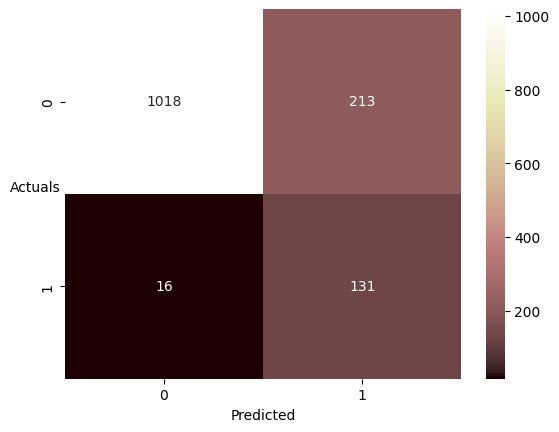

In [146]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.06656909141457523:
        a=1
    else:
        a=0
    y_class_pred.append(a)
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='pink');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_train[:len(y_class_pred)], y_class_pred, digits=3))

              precision    recall  f1-score   support

           0      0.985     0.827     0.899      1231
           1      0.381     0.891     0.534       147

    accuracy                          0.834      1378
   macro avg      0.683     0.859     0.716      1378
weighted avg      0.920     0.834     0.860      1378



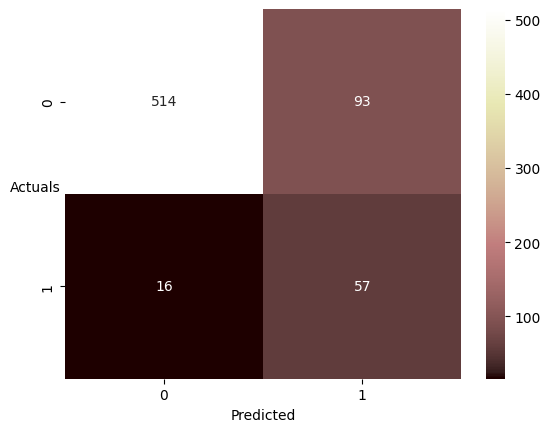

In [148]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.06656909141457523:
        a=1
    else:
        a=0
    y_class_pred.append(a)
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='pink');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [149]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.970     0.847     0.904       607
           1      0.380     0.781     0.511        73

    accuracy                          0.840       680
   macro avg      0.675     0.814     0.708       680
weighted avg      0.906     0.840     0.862       680



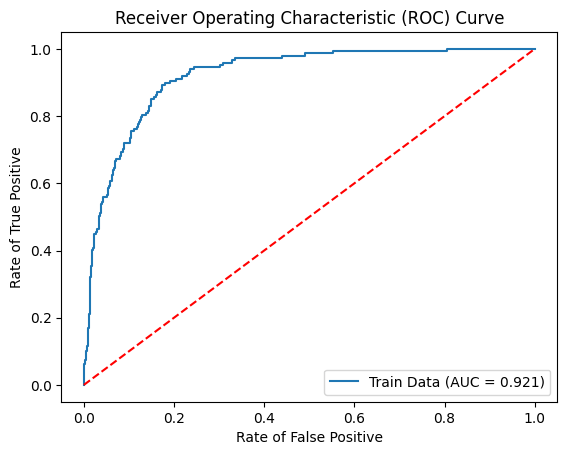

In [150]:
#AUC-ROC curve for training data
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, pred_train_lda_prob)
auc_train = metrics.auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, label=f'Train Data (AUC = {auc_train:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('Rate of False Positive')
plt.ylabel('Rate of True Positive')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


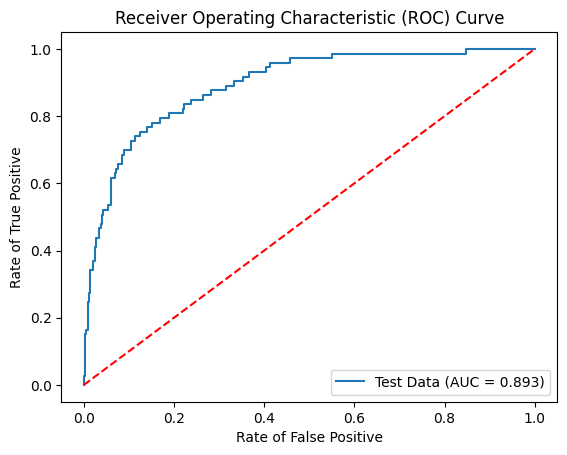

In [151]:
# AUC-ROC curve for test data
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, pred_test_lda_prob)
auc_test = metrics.auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label=f'Test Data (AUC = {auc_test:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('Rate of False Positive')
plt.ylabel('Rate of True Positive')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#SMOTE

In [152]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy = .75)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [154]:
model_smote = LinearDiscriminantAnalysis()
model_smote.fit(X_train_res, y_train_res)
pred_train_smote = model_smote.predict(X_train_res)
pred_test_smote = model_smote.predict(X_test)
print("Training Set Evaluation:")
print(classification_report(y_train_res, pred_train_smote))
print("Test Set Evaluation:")
print(classification_report(y_test, pred_test_smote))

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1231
           1       0.84      0.84      0.84       923

    accuracy                           0.86      2154
   macro avg       0.86      0.86      0.86      2154
weighted avg       0.86      0.86      0.86      2154

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       607
           1       0.44      0.73      0.55        73

    accuracy                           0.87       680
   macro avg       0.70      0.81      0.74       680
weighted avg       0.91      0.87      0.89       680



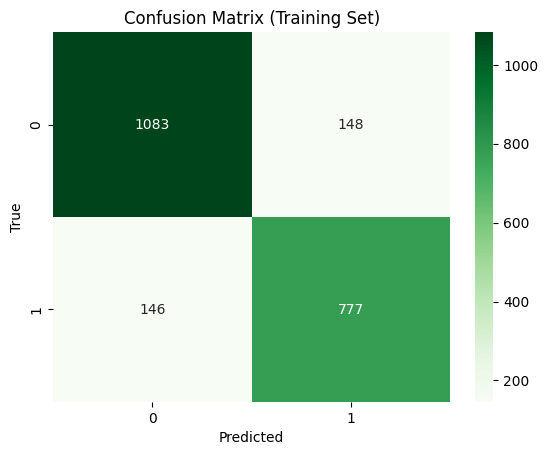

In [155]:
cm_train = confusion_matrix(y_train_res, pred_train_smote)
sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Set)')
plt.show()

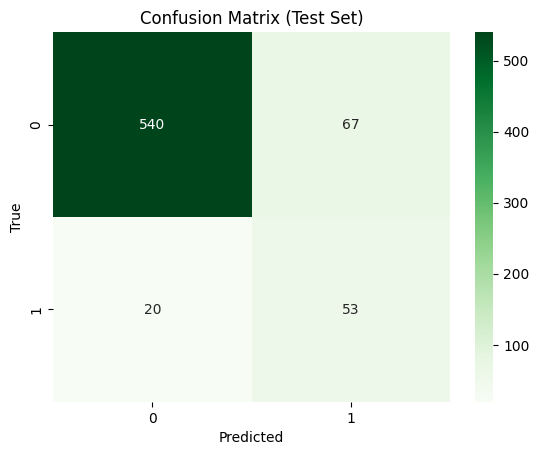

In [156]:
cm_test = confusion_matrix(y_test, pred_test_smote)

# Plot confusion matrix for test set
sns.heatmap(cm_test, annot=True, cmap='Greens', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [157]:
import matplotlib.pyplot as plt
from sklearn import metrics

AUC for the Training Data: 0.861


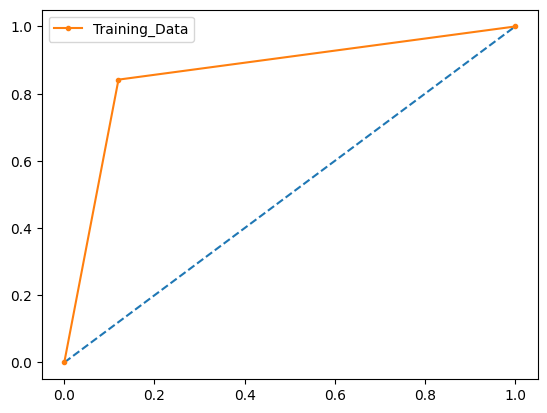

In [158]:
# calcluate AUC and ROC fortraining data
auc_train = metrics.roc_auc_score(y_train_res, pred_train_smote)
print('AUC for the Training Data: %.3f' % auc_train)
# Calculate ROC curve
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train_res, pred_train_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the ROC curve for the model on training data
plt.plot(fpr_train, tpr_train, marker='.', label='Training_Data')
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.808


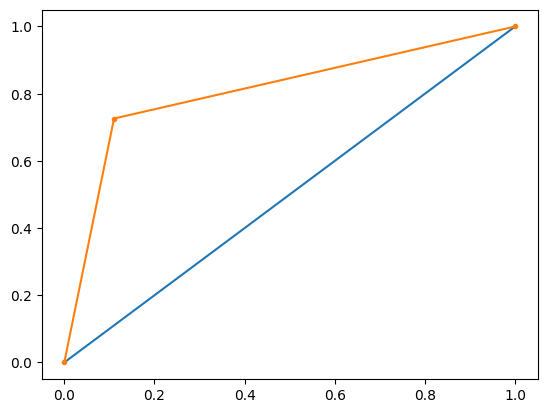

In [159]:
# for test set
auc_test = metrics.roc_auc_score(y_test, pred_test_smote)
print('AUC for the Test Data: %.3f' % auc_test)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, pred_test_smote)
plt.plot([0, 1], [0, 1], linestyle='-')
# Plot the ROC curve for the model on test data
plt.plot(fpr_test, tpr_test, marker='.', label='Test_Data')
plt.show()

# PART A: Compare the performances of Logistic Regression, Random Forest, and LDA models (include ROC curve)

## In our analysis, we evaluated three models: Logistic Regression, Random Forest, and Linear Discriminant Analysis (LDA).

## Logistic Regression:-This model showed good performance in identifying positive cases, with an 85% recall rate on the training data and 76% on the test data. However, its precision, which measures its ability to avoid false positives, was moderate at around 40% on the training data and 37% on the test data. The model's AUC values were decent, indicating its ability to distinguish between classes.
## Random Forest:-This model demonstrated excellent precision, especially on the training data, with a rate of 96%. However, its recall, which measures its ability to capture all positive cases, was comparatively lower at 54% on the training data and 31% on the test data. Nonetheless, its AUC values were impressive, indicating strong discriminatory power and generalization.
## LDA:-The LDA model's performance fell between Logistic Regression and Random Forest. It showed moderate recall and precision rates, with slightly lower recall than Logistic Regression and slightly higher precision than Random Forest. Its AUC values were good, indicating effective discrimination between classes.
## Overall, Random Forest emerged as the top performer, excelling in terms of AUC, recall, and precision. Logistic Regression and LDA showed comparable performance, with Logistic Regression having slightly better recall and LDA slightly better precision. The choice of model depends on specific needs; for instance, Logistic Regression might be preferred for high recall, while Random Forest could be chosen for high precision.

# PART A-Conclusions and Recommendations

# Conclusions:

## The Logistic Regression model, with a threshold of 0.1076, shows consistent performance. It predicts defaults with an accuracy of 84% on the training data and 83.5% on the testing data, indicating stable predictions across different datasets.
# Both precision and recall values for non-default and default cases remain steady, indicating the model's reliability in identifying instances from both classes.
## The AUC scores confirm the model's ability to distinguish between default and non-default cases consistently, highlighting its stable discriminative power.
# Recommendations:

## Increase Data Collection: Gathering more data, particularly on default cases, can improve the model's exposure to such instances and enhance its predictive performance.
## Explore Feature Engineering: Further exploration of the model through feature engineering techniques may enhance its ability to identify default cases more accurately. This involves modifying or creating new features from existing data.
## Consider Ensemble Techniques: Incorporating ensemble techniques like boosting or bagging could improve the model's performance in identifying default cases. These methods involve combining multiple models to enhance predictive accuracy and robustness.
## Overall, while the Logistic Regression model demonstrates stable and reliable performance in predicting defaults, there's room for improvement through data collection, feature engineering, and the adoption of ensemble techniques. These steps can enhance the model's accuracy in identifying default cases effectively.








# **PART** **B**:
# **Problem** **Statement**:

## The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights. You are expected to do the Market Risk Analysis using Python.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [164]:
path = "/content/Market+Risk+Dataset (1).csv"
mr=pd.read_csv(path)
mr.head(5)

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

In [167]:
mr.shape

(314, 11)

In [165]:
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [166]:
mr.describe()

Infosys  Indian Hotel  Mahindra & Mahindra   Axis Bank        SAIL  \
count  314.000000    314.000000           314.000000  314.000000  314.000000   
mean   511.340764    114.560510           636.678344  540.742038   59.095541   
std    135.952051     22.509732           102.879975  115.835569   15.810493   
min    234.000000     64.000000           284.000000  263.000000   21.000000   
25%    424.000000     96.000000           572.000000  470.500000   47.000000   
50%    466.500000    115.000000           625.000000  528.000000   57.000000   
75%    630.750000    134.000000           678.000000  605.250000   71.750000   
max    810.000000    157.000000           956.000000  808.000000  104.000000   

       Shree Cement   Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
count    314.000000   314.000000    314.000000     314.000000   314.000000  
mean   14806.410828   633.468153    147.627389      53.713376   372.659236  
std     4288.275085   171.855893     65.879195      31.248985   202.262668  
min     5543.000000   338.000000     53.000000       3.000000    14.000000  
25%    10952.250000   478.500000     88.250000      25.250000   243.250000  
50%    16018.500000   614.000000    142.500000      53.000000   376.000000  
75%    17773.250000   785.000000    182.750000      82.000000   534.000000  
max    24806.000000  1089.000000    338.000000     117.000000   871.000000

In [168]:
mr.isnull().sum()

Date                   0
Infosys                0
Indian Hotel           0
Mahindra & Mahindra    0
Axis Bank              0
SAIL                   0
Shree Cement           0
Sun Pharma             0
Jindal Steel           0
Idea Vodafone          0
Jet Airways            0
dtype: int64

In [172]:
mr2 = mr.columns.str.replace(' ', '_').str.replace('&','and')

In [173]:
mr2

Index(['Date', 'Infosys', 'Indian_Hotel', 'Mahindra_and_Mahindra', 'Axis_Bank',
       'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways'],
      dtype='object')

In [174]:
mr2.duplicated().sum()

0

## PART B: Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference


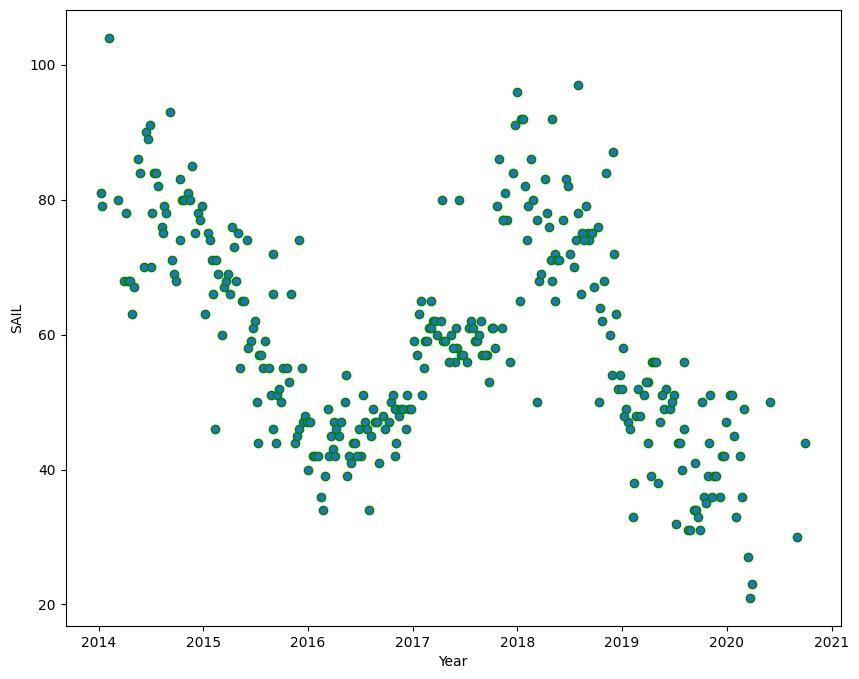

In [184]:
plt.figure(figsize = (10, 8))
mr['dates'] = [pd.to_datetime(d) for d in mr['Date']]
plt.scatter(mr['dates'], mr['SAIL'], edgecolors='green')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.show()

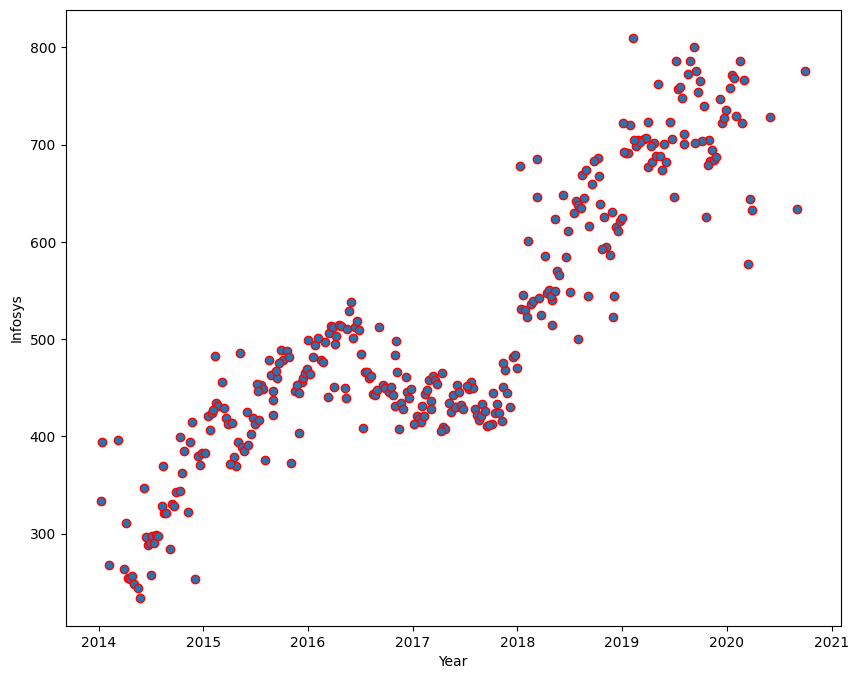

In [186]:
plt.figure(figsize = (10, 8))
mr['dates'] = [pd.to_datetime(d) for d in mr['Date']]
plt.scatter(mr['dates'], mr['Infosys'], edgecolors='red')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.show()

## PART B: Calculate Returns for all stocks with inference

In [187]:
stock = np.log(mr.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)

In [188]:
stock.shape

(314, 10)

In [190]:
stock.head()

Infosys  Indian_Hotel  Mahindra_and_Mahindra  Axis_Bank      SAIL  \
0       NaN           NaN                    NaN        NaN       NaN   
1 -0.026873     -0.014599               0.006572   0.048247  0.028988   
2 -0.011742      0.000000              -0.008772  -0.021979 -0.028988   
3 -0.003945      0.000000               0.072218   0.047025  0.000000   
4  0.011788     -0.045120              -0.012371  -0.003540 -0.076373   

   Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0           NaN         NaN           NaN            NaN          NaN  
1      0.032831    0.094491     -0.065882       0.011976     0.086112  
2     -0.013888   -0.004930      0.000000      -0.011976    -0.078943  
3      0.007583   -0.004955     -0.018084       0.000000     0.007117  
4     -0.019515    0.011523     -0.140857      -0.049393    -0.148846

##PART B: Calculate Stock Means and Standard Deviation for all stocks with inference

In [194]:
stock_means = stock.mean(axis = 0).round(5)
stock_means

Infosys                  0.00279
Indian_Hotel             0.00027
Mahindra_and_Mahindra   -0.00151
Axis_Bank                0.00117
SAIL                    -0.00346
Shree_Cement             0.00368
Sun_Pharma              -0.00145
Jindal_Steel            -0.00412
Idea_Vodafone           -0.01061
Jet_Airways             -0.00955
dtype: float64

In [195]:
stock_std = stock.std(axis = 0).round(5)
stock_std

Infosys                  0.03507
Indian_Hotel             0.04713
Mahindra_and_Mahindra    0.04017
Axis_Bank                0.04583
SAIL                     0.06219
Shree_Cement             0.03992
Sun_Pharma               0.04503
Jindal_Steel             0.07511
Idea_Vodafone            0.10432
Jet_Airways              0.09797
dtype: float64

## PART B: Draw a plot of Stock Means vs Standard Deviation and state your inference

In [199]:
df = pd.DataFrame({'Means':stock_means, 'STD_DEV': stock_std})
df

Means  STD_DEV
Infosys                0.00279  0.03507
Indian_Hotel           0.00027  0.04713
Mahindra_and_Mahindra -0.00151  0.04017
Axis_Bank              0.00117  0.04583
SAIL                  -0.00346  0.06219
Shree_Cement           0.00368  0.03992
Sun_Pharma            -0.00145  0.04503
Jindal_Steel          -0.00412  0.07511
Idea_Vodafone         -0.01061  0.10432
Jet_Airways           -0.00955  0.09797

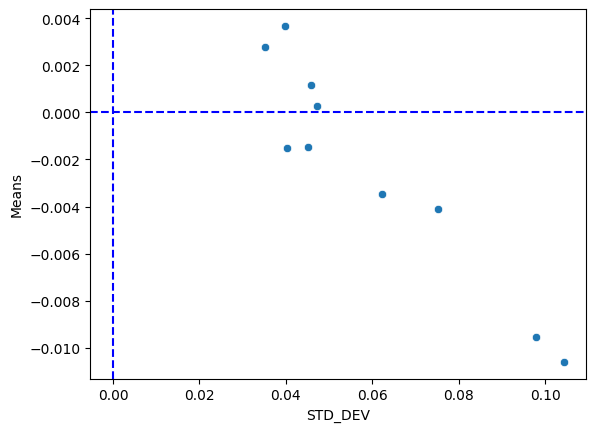

In [200]:
plot = sns.scatterplot(data=df, x='STD_DEV', y='Means')
plot.axvline(x=0, linestyle='--', color='blue')
plot.axhline(y=0, linestyle='--', color='blue')
plt.show()

## PART B: Conclusions and Recommendations

In analyzing the stock data across various companies, several notable insights emerge. Particularly, Infosys and Shree Cement emerge as standout options, showcasing the highest average returns, suggesting promising investment prospects. Conversely, Idea Vodafone and Jet Airways exhibit the lowest average returns, signaling a need for caution when considering these entities for investment ventures.

For investors seeking to optimize their profitability, it is advisable to explore opportunities within companies like Infosys and Shree Cement. These firms consistently demonstrate superior returns over the observed period, presenting attractive investment avenues for individuals aiming to maximize their financial gains.

Conversely, investors inclined towards risk aversion should exercise prudence when contemplating investments in companies such as Idea Vodafone and Jet Airways, given their track record of lower mean returns.

Furthermore, it's essential to acknowledge the presence of short-term fluctuations inherent in the market. Holding onto investments for extended durations can serve as a strategy to mitigate the impact of market volatility and potentially yield higher returns over time.

Regular monitoring of investment performance and staying abreast of market trends are indispensable practices for investors. Remaining informed enables investors to make well-informed decisions and adapt their strategies to evolving market conditions effectively.